# COVID-19 in Australia (from covidlive.com.au)

NOTE: Because the [covidlive](https://covidlive.com.au/) database is being updated throughout the day, it only makes sense to run this notebook at the end of the day when all of the data has been loaded for the day. In the last cell of this notebook, I warn where last-day data is missing (or looks odd), but this is imperfect.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span><ul class="toc-item"><li><span><a href="#Usual-imports-etc." data-toc-modified-id="Usual-imports-etc.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Usual imports etc.</a></span></li><li><span><a href="#Other-useful-information" data-toc-modified-id="Other-useful-information-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Other useful information</a></span></li><li><span><a href="#Warnings" data-toc-modified-id="Warnings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Warnings</a></span></li><li><span><a href="#State-populations-and-per-capita-calculations" data-toc-modified-id="State-populations-and-per-capita-calculations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>State populations and per capita calculations</a></span></li></ul></li><li><span><a href="#Useful-functions" data-toc-modified-id="Useful-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Useful functions</a></span><ul class="toc-item"><li><span><a href="#Bar-charts---count-and-rate-per-capita" data-toc-modified-id="Bar-charts---count-and-rate-per-capita-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bar charts - count and rate per capita</a></span></li><li><span><a href="#State-line-plots" data-toc-modified-id="State-line-plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>State line plots</a></span></li></ul></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Capture-cumulative-and-daily-data-for-selected-columns" data-toc-modified-id="Capture-cumulative-and-daily-data-for-selected-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Capture cumulative and daily data for selected columns</a></span></li><li><span><a href="#Weekly-charts" data-toc-modified-id="Weekly-charts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Weekly charts</a></span></li><li><span><a href="#Bar-Charts" data-toc-modified-id="Bar-Charts-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bar Charts</a></span></li><li><span><a href="#Active-Cases" data-toc-modified-id="Active-Cases-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Active Cases</a></span><ul class="toc-item"><li><span><a href="#Bar-chart-of-active-cases" data-toc-modified-id="Bar-chart-of-active-cases-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Bar chart of active cases</a></span></li><li><span><a href="#Active-cases---line-plots" data-toc-modified-id="Active-cases---line-plots-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Active cases - line plots</a></span></li></ul></li><li><span><a href="#Source-of-infection" data-toc-modified-id="Source-of-infection-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Source of infection</a></span><ul class="toc-item"><li><span><a href="#Extraction" data-toc-modified-id="Extraction-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Extraction</a></span></li><li><span><a href="#Check-latest-raw-SOI-data-against-raw-case-count-data" data-toc-modified-id="Check-latest-raw-SOI-data-against-raw-case-count-data-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Check latest raw SOI data against raw case count data</a></span></li><li><span><a href="#Plot-national-SOI" data-toc-modified-id="Plot-national-SOI-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Plot national SOI</a></span></li><li><span><a href="#Plot-cases-under-investigation-by-state" data-toc-modified-id="Plot-cases-under-investigation-by-state-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Plot cases under investigation by state</a></span></li></ul></li><li><span><a href="#Local-cases/transmission" data-toc-modified-id="Local-cases/transmission-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Local cases/transmission</a></span><ul class="toc-item"><li><span><a href="#Create-dataframe-of-local-transmission" data-toc-modified-id="Create-dataframe-of-local-transmission-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Create dataframe of local transmission</a></span></li><li><span><a href="#Bar-charts-cumulative-local-transmission" data-toc-modified-id="Bar-charts-cumulative-local-transmission-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Bar charts cumulative local transmission</a></span></li><li><span><a href="#Weekly-charts-for-local-transmission" data-toc-modified-id="Weekly-charts-for-local-transmission-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Weekly charts for local transmission</a></span></li><li><span><a href="#Recent-local-transmission-daily-charts" data-toc-modified-id="Recent-local-transmission-daily-charts-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Recent local transmission daily charts</a></span></li></ul></li><li><span><a href="#Local-outbreaks" data-toc-modified-id="Local-outbreaks-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Local outbreaks</a></span><ul class="toc-item"><li><span><a href="#Supporting-functions" data-toc-modified-id="Supporting-functions-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Supporting functions</a></span></li><li><span><a href="#Named-outbreaks" data-toc-modified-id="Named-outbreaks-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Named outbreaks</a></span></li><li><span><a href="#Outbreaks-on-a-log-scale" data-toc-modified-id="Outbreaks-on-a-log-scale-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Outbreaks on a log scale</a></span></li><li><span><a href="#Outbreak-Growth-Factors" data-toc-modified-id="Outbreak-Growth-Factors-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Outbreak Growth Factors</a></span></li><li><span><a href="#Model-for-the-effective-reproduction-number-$R_t$" data-toc-modified-id="Model-for-the-effective-reproduction-number-$R_t$-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>Model for the effective reproduction number $R_t$</a></span></li><li><span><a href="#Comparative-$R_t$-and-GF" data-toc-modified-id="Comparative-$R_t$-and-GF-10.6"><span class="toc-item-num">10.6&nbsp;&nbsp;</span>Comparative $R_t$ and GF</a></span></li><li><span><a href="#Doubling-times---speculative-charts" data-toc-modified-id="Doubling-times---speculative-charts-10.7"><span class="toc-item-num">10.7&nbsp;&nbsp;</span>Doubling times - speculative charts</a></span></li><li><span><a href="#Short-run-projections-for-local-new-case-growth" data-toc-modified-id="Short-run-projections-for-local-new-case-growth-10.8"><span class="toc-item-num">10.8&nbsp;&nbsp;</span>Short-run projections for local new case growth</a></span></li></ul></li><li><span><a href="#Hospitalised" data-toc-modified-id="Hospitalised-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Hospitalised</a></span></li><li><span><a href="#Explore-cases-to-deaths-and-cases-to-hospitalisation-curves" data-toc-modified-id="Explore-cases-to-deaths-and-cases-to-hospitalisation-curves-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Explore cases to deaths and cases to hospitalisation curves</a></span><ul class="toc-item"><li><span><a href="#supporting-functions" data-toc-modified-id="supporting-functions-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>supporting functions</a></span></li><li><span><a href="#Establish-historical-baseline" data-toc-modified-id="Establish-historical-baseline-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Establish historical baseline</a></span></li><li><span><a href="#Use-above-baseline-to-look-at-the-recent-Sydney-Delta-outbreak" data-toc-modified-id="Use-above-baseline-to-look-at-the-recent-Sydney-Delta-outbreak-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Use above baseline to look at the recent Sydney Delta outbreak</a></span></li><li><span><a href="#Running-death-rates" data-toc-modified-id="Running-death-rates-12.4"><span class="toc-item-num">12.4&nbsp;&nbsp;</span>Running death rates</a></span></li><li><span><a href="#running-death-cumulative-sum" data-toc-modified-id="running-death-cumulative-sum-12.5"><span class="toc-item-num">12.5&nbsp;&nbsp;</span>running death cumulative sum</a></span></li><li><span><a href="#Active-cases-and-hospitalisations-(stock-statistics)" data-toc-modified-id="Active-cases-and-hospitalisations-(stock-statistics)-12.6"><span class="toc-item-num">12.6&nbsp;&nbsp;</span>Active cases and hospitalisations (stock statistics)</a></span></li></ul></li><li><span><a href="#Vaccination-plots" data-toc-modified-id="Vaccination-plots-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Vaccination plots</a></span></li><li><span><a href="#The-End" data-toc-modified-id="The-End-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Python set-up

### Usual imports etc.

In [1]:
# global imports
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.units as munits
import matplotlib.dates as mdates
import datetime

from pathlib import Path
from typing import Dict, List

# local imports
sys.path.append(r'../bin')
import plotstuff as ps
import Henderson

# pandas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting
plt.style.use('ggplot')

# matplotlib stuff for date formatting xticklabels
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter
munits.registry[pd.Timestamp] = converter
munits.registry[pd.Period] = converter

### Other useful information

In [2]:
# save location
CHART_DIRECTORY = '../charts'
Path(CHART_DIRECTORY).mkdir(parents=True, exist_ok=True)
CHART_DIRECTORY += '/!AS2-'

SOURCE = 'Source: https://covidlive.com.au/'

AU_COLOURS = ['#dd0000', 'darkorange', 'gold', 'seagreen',
              'dodgerblue', 'blue', 'mediumorchid', 'hotpink',
              '#555555']  

# used in charts of the recent period
RECENT = 92 # days

# standard plot settings - used in calls to ps.finalise_plot()
std_barchart_settings ={
    'chart_directory': CHART_DIRECTORY,
    'rfooter': SOURCE,
    'show': True,
}

std_plot_settings = {
    'margins': 0.02,
    **std_barchart_settings, 
}

### Warnings

In [3]:
warning_count = 0
warnings = set()

def warn(message: str) -> None:
    global warning_count
    if message:
        if message not in warnings:
            warning_count += 1
        print(message)
        warnings.add(message)
    return None

def print_warnings() -> None:
    if warning_count == 0:
        return None
    
    print(f'NOTE: {warning_count} warning{"s" if warning_count > 1 else ""}')

    [print(m) for m in warnings]
    return None

### State populations and per capita calculations

In [4]:
# data compiled from ABS tables for age by year by state
# https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/dec-2020#data-download
# see notebook in directory ../abs, which generates the dictionaries below. 

# Constants across all tests
state_pop = {
    'NSW': 8167893,
    'Victoria': 6696630,
    'Queensland': 5176044,
    'SA': 1770494,
    'WA': 2663976,
    'Tasmania': 540781,
    'NT': 246283,
    'ACT': 431325
}
state_pop["Australia"] = sum(state_pop.values())
print(f'Australian population: {state_pop["Australia"]:,}')

eligible_pop = {
    'NSW': 6566161,
    'Victoria': 5407615,
    'Queensland': 4112639,
    'SA': 1440565,
    'WA': 2115458,
    'Tasmania': 440196,
    'NT': 190705,
    'ACT': 344013
}
eligible_pop["Australia"] = sum(eligible_pop.values())
print(f'Australian eligible population: {eligible_pop["Australia"]:,}')

# per capita ...
power = 6
power_conversion = {
    0:  'Unit',
    3:  'Thousand',
    6:  'Million', # beyond here is a bit silly ...
    9:  'Billion', 
    12: 'Trillion',
    15: 'Quadrillion',
    18: 'Quintillion',
}
if power not in power_conversion.keys():
    power = 6
power_text = power_conversion[power]
factor = 10 ** power
state_pop = pd.Series(state_pop) / factor
eligible_pop =  pd.Series(eligible_pop) / factor

Australian population: 25,693,426
Australian eligible population: 20,617,352


## Useful functions

### Bar charts - count and rate per capita 

In [5]:
name_map = {
    'NSW': 'NSW',
    'Victoria': 'Vic',
    'Queensland': 'Qld',
    'WA': 'WA',
    'SA': 'SA',
    'Tasmania': 'Tas',
    'NT': 'NT',
    'ACT': 'ACT',
    'Australia': 'Australia'
}

def two_bar_plots(data_dict, item, prefix, desc,
                  pop_series=state_pop,
                  pop_label='population'):
    """latest cumulative and cumulative per population charts
       Note: incomplete data on the last day is navigated."""
    
    # get latest valid data with date of validity
    frame = data_dict[item]
    last_valid = frame.apply(pd.Series.last_valid_index)
    last_valid = (
        (last_valid.dt.day.astype(str) 
         + '-' 
         + (last_valid.dt.month_name().astype(str)))
        .str[:6]
    )
    last_data = frame.ffill().iloc[-1]
    last_data_pc = (last_data / pop_series).round(1)
    last_data_pc = last_data_pc[last_data.index]
    
    serieses = (last_data.astype(int), last_data_pc)
    suffixes = ('', f' per {power_text.lower()} {pop_label}')
    xlabels = ('Count', 'Rate')
    
    for series, suffix, xlabel in zip(serieses, suffixes, xlabels):
        series.index = series.index.map(name_map) + ' ' + last_valid
        series = series.sort_values()
        ps.plot_barh(series, 
                     title=f'{prefix} COVID19 {desc}{suffix}'.strip(),
                     xlabel=xlabel,
                     **std_barchart_settings,
                    )


### State line plots

In [6]:
def line_plots(table, title, ylabel):
    
    # initialise
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)
    order = ['NSW', 'Victoria', 'Queensland', 'WA', 
             'SA', 'Tasmania', 'ACT', 'NT']

    # plot
    for recent in [0, RECENT]:
        data = table.iloc[-recent:]
        
        fig, ax = plt.subplots()
        for state in order:
            line = data[state]
            ax.plot(line.index, line.values, label=state, lw=2.5)

        ax.legend(loc='best')
        title_extra = '' if recent == 0 else ' (recent)'
                
        ps.finalise_plot(
            ax, 
            title=title+title_extra, 
            xlabel=None,
            ylabel=ylabel,
            **std_plot_settings,
        )   

## Get the data

In [7]:
def get_data_from_JSON():
    """ Get the latest data from covidlive.com.au
        Return the complete DataFrame downloaded 
        from covidlive.com.au, using the JSON API"""
    
    # get the data
    url = 'https://covidlive.com.au/covid-live.json'
    data = pd.read_json(url)

    # convert REPORT_DATE to pandas Series of datetime64 items
    data.REPORT_DATE = pd.to_datetime(data.REPORT_DATE)
        
    # issue a warning if records exist ahead of today
    today = pd.Timestamp(datetime.datetime.now().date())
    if (data.REPORT_DATE > today).any():
        warn(f'Warning: There are records into the future?')
        all_frame = all_frame[data.REPORT_DATE <= today]

    # return
    return data

In [8]:
# obtain the latest data ...
raw_json_data = get_data_from_JSON()

In [9]:
# Quick peak at the data columns
raw_json_data.columns  

Index(['REPORT_DATE', 'LAST_UPDATED_DATE', 'CODE', 'NAME', 'CASE_CNT',
       'TEST_CNT', 'DEATH_CNT', 'RECOV_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT',
       'MED_HOSP_CNT', 'SRC_OVERSEAS_CNT', 'SRC_INTERSTATE_CNT',
       'SRC_CONTACT_CNT', 'SRC_UNKNOWN_CNT', 'SRC_INVES_CNT', 'PREV_CASE_CNT',
       'PREV_TEST_CNT', 'PREV_DEATH_CNT', 'PREV_RECOV_CNT', 'PREV_MED_ICU_CNT',
       'PREV_MED_VENT_CNT', 'PREV_MED_HOSP_CNT', 'PREV_SRC_OVERSEAS_CNT',
       'PREV_SRC_INTERSTATE_CNT', 'PREV_SRC_CONTACT_CNT',
       'PREV_SRC_UNKNOWN_CNT', 'PREV_SRC_INVES_CNT', 'PROB_CASE_CNT',
       'PREV_PROB_CASE_CNT', 'ACTIVE_CNT', 'PREV_ACTIVE_CNT', 'NEW_CASE_CNT',
       'PREV_NEW_CASE_CNT', 'VACC_DIST_CNT', 'PREV_VACC_DIST_CNT',
       'VACC_DOSE_CNT', 'PREV_VACC_DOSE_CNT', 'VACC_PEOPLE_CNT',
       'PREV_VACC_PEOPLE_CNT', 'VACC_AGED_CARE_CNT', 'PREV_VACC_AGED_CARE_CNT',
       'VACC_GP_CNT', 'PREV_VACC_GP_CNT', 'VACC_FIRST_DOSE_CNT',
       'PREV_VACC_FIRST_DOSE_CNT'],
      dtype='object')

In [10]:
# Quick look at the categorising column
raw_json_data.NAME.unique()

array(['Australia', 'NSW', 'Victoria', 'Queensland', 'WA', 'SA',
       'Tasmania', 'ACT', 'NT'], dtype=object)

## Capture cumulative and daily data for selected columns

In [11]:
selected_cols = {
    # column name      # plain English for charts
    'CASE_CNT':        'cases',
    'DEATH_CNT':       'deaths',
    'TEST_CNT':        'tests',
    'VACC_DOSE_CNT':   'vacc doses',
}

In [12]:
def get_pivot_table(raw_json_data, item):
    """Return a DataFrame of data for the specified item from the raw_json_data
       The columns will be Australian states, plus the Australian total.
       The rows will be dates, in ascending date order.
       Provide warnings for mallformed data."""

    table = (
        raw_json_data
        .pivot(index='REPORT_DATE', columns='NAME', values=item)
        .sort_index(ascending=True)
    )
    
    # if state totals have NaNs, change a non-NaN 'Australia' to NaN
    states = table.columns.to_list()
    if 'Australia' in states:
        states.remove('Australia')
        odd_rows = table[states].isna().any(axis=1) & table['Australia'].notna()
        if odd_rows.any():
            fix_these_rows = odd_rows[odd_rows].index
            #warn(f'Nullifying these Australian totals in {item} '
            #     f'{fix_these_rows.to_list()}')
            table.loc[fix_these_rows, 'Australia'] = np.nan
    
    # drop all-NaN rows
    missing_rows = table.isna().all(axis=1)
    if missing_rows.any():
        drop_these_rows = missing_rows[missing_rows].index
        #warn(f'Dropping all-NaN rows from {item}: {drop_these_rows.to_list()}')
        table.drop(drop_these_rows, inplace=True)
    
    # check if missing values in last row (but not missing in penultimate row)
    situation = table.iloc[-1].isna() & table.iloc[-2].notna()
    if situation.sum():
        warn(f'We are missing the latest {item} '
             f'for {", ".join(situation[situation].index.to_list())}')

    # check if last cumulative value is less than its predecessor ...
    not_max = table.iloc[-1] < table.iloc[-2]
    if not_max.sum():
        warn(f'Lastest value less than its predecessor in {item} '
             f'for {", ".join(not_max[not_max].index.to_list())}')

    return (table)

In [13]:
def get_item(item, raw_json_data):
    """Return a DataFrame dates-x-states for item.
       Ensure early NaNs are mapped to zero.
       But keep any NaNs at the end of the table."""
    
    
    raw = get_pivot_table(raw_json_data, item)
    end_nan_mask = raw.isna().astype(float).replace(1.0, np.nan).bfill().isna()
    
    data = (
        raw
        .ffill()
        .fillna(0)
        .where(~end_nan_mask, other=np.nan)
    )

    return data

In [14]:
cum_u = {}
daily_u = {}
daily_c = {}
cum_c = {}

for item in selected_cols.keys():
    # get the raw cumulative data
    cum_u[item] = get_item(item, raw_json_data)

    # adjusted daily and cumulative data (for corrections)
    daily_u[item], daily_c[item], cum_c[item] = (
        ps.dataframe_correction(cum_u[item], verbose=False)
    )

We are missing the latest TEST_CNT for Australia, SA, Tasmania


In [15]:
# Check - raw daily new cases  
cum_u['CASE_CNT'].diff()[-5:]

NAME          ACT  Australia     NSW   NT  Queensland   SA  Tasmania  \
REPORT_DATE                                                            
2021-08-31   13.0     1239.0  1151.0  0.0         0.0  0.0       0.0   
2021-09-01   23.0     1242.0  1102.0  0.0         1.0  0.0       0.0   
2021-09-02   12.0     1472.0  1280.0  0.0         2.0  4.0       0.0   
2021-09-03   18.0     1645.0  1416.0  0.0         0.0  2.0       0.0   
2021-09-04   32.0     1741.0  1516.0  0.0         2.0  2.0       0.0   

NAME         Victoria   WA  
REPORT_DATE                 
2021-08-31       75.0  0.0  
2021-09-01      116.0  0.0  
2021-09-02      174.0  0.0  
2021-09-03      209.0  0.0  
2021-09-04      189.0  0.0

## Weekly charts

In [16]:
# Check - cooked daily new cases  
daily_c['CASE_CNT'].tail()

NAME          ACT  Australia     NSW   NT  Queensland   SA  Tasmania  \
REPORT_DATE                                                            
2021-08-31   13.0     1239.0  1151.0  0.0         0.0  0.0       0.0   
2021-09-01   23.0     1242.0  1102.0  0.0         1.0  0.0       0.0   
2021-09-02   12.0     1472.0  1280.0  0.0         2.0  4.0       0.0   
2021-09-03   18.0     1645.0  1416.0  0.0         0.0  2.0       0.0   
2021-09-04   32.0     1741.0  1516.0  0.0         2.0  2.0       0.0   

NAME         Victoria   WA  
REPORT_DATE                 
2021-08-31       75.0  0.0  
2021-09-01      116.0  0.0  
2021-09-02      174.0  0.0  
2021-09-03      209.0  0.0  
2021-09-04      189.0  0.0

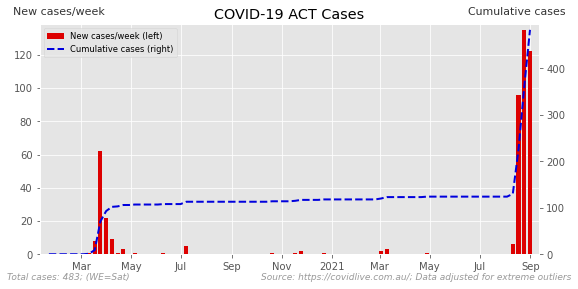

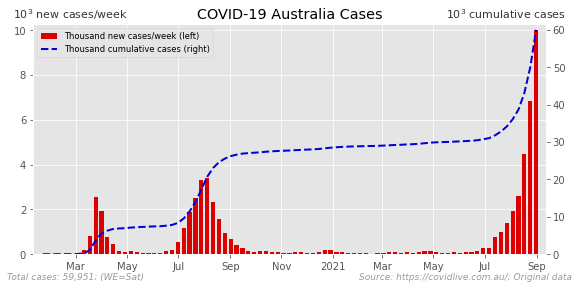

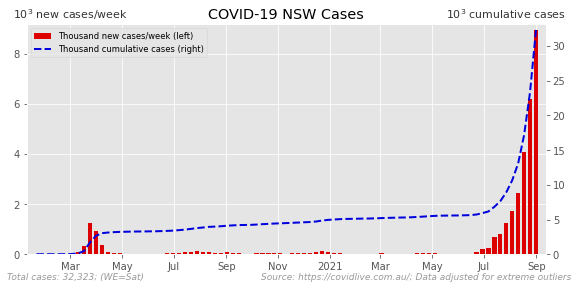

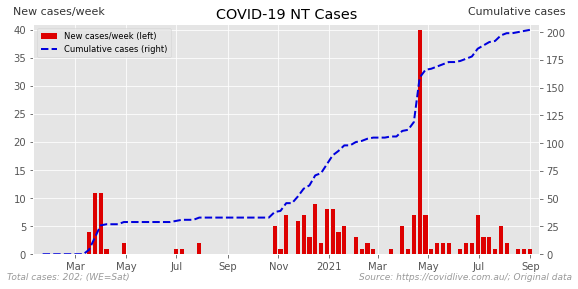

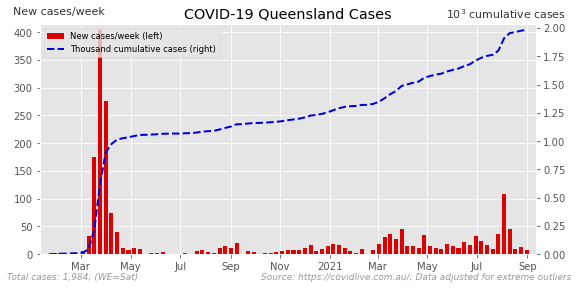

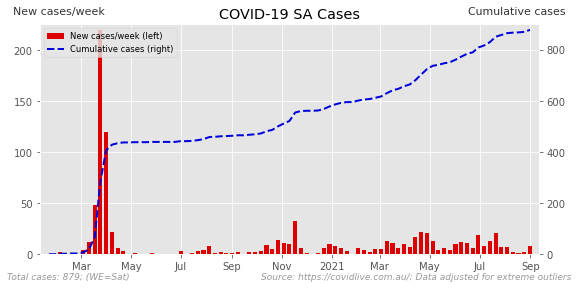

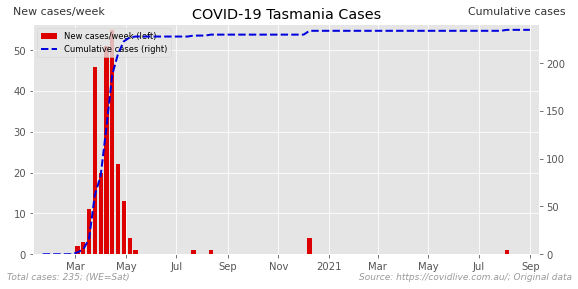

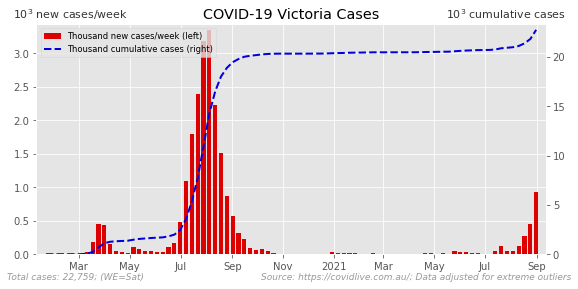

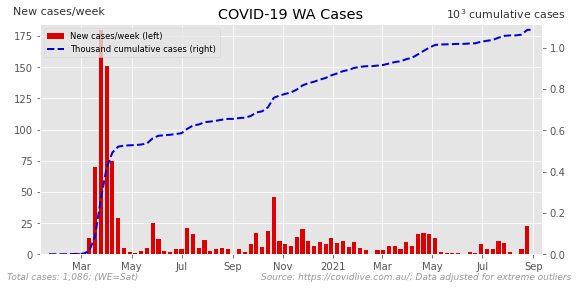

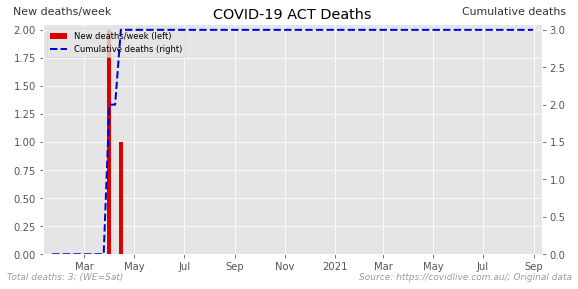

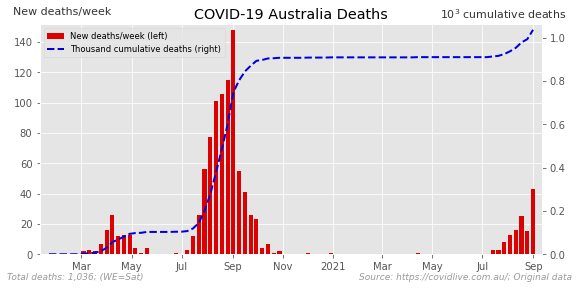

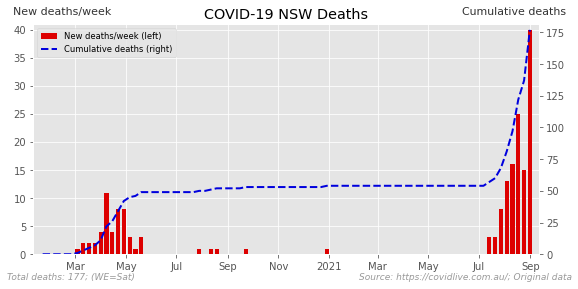

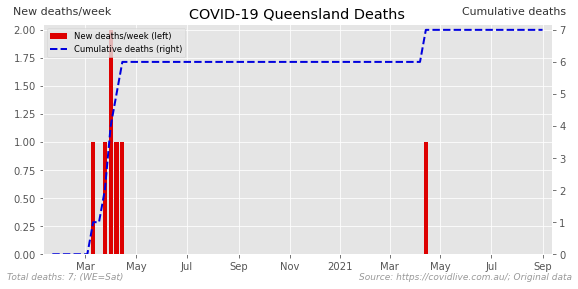

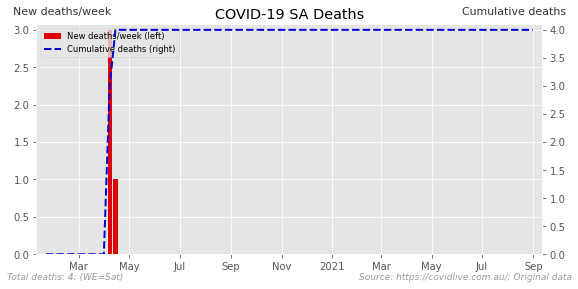

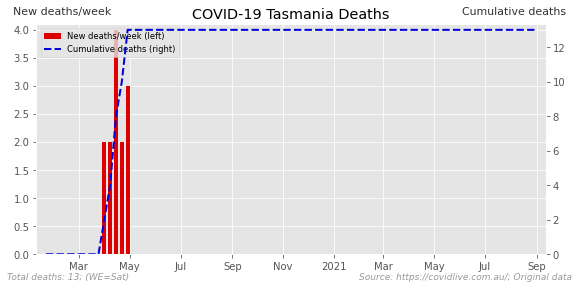

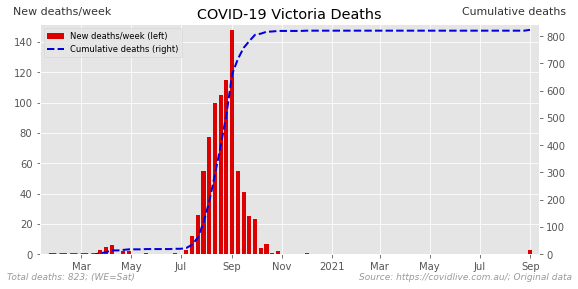

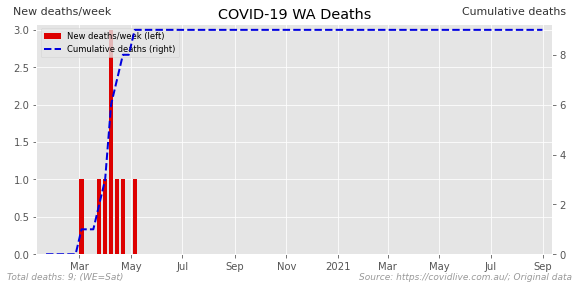

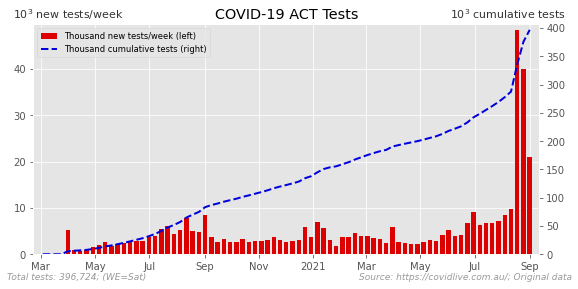

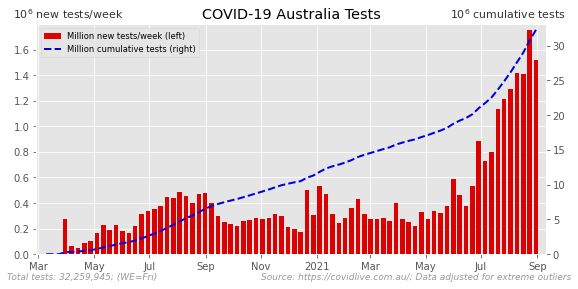

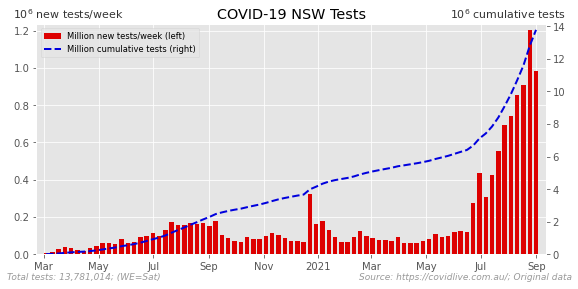

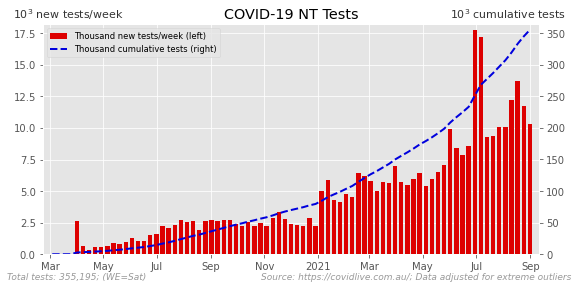

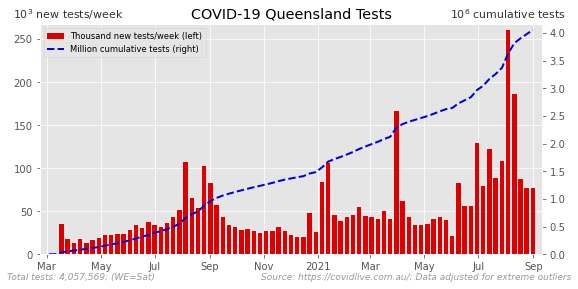

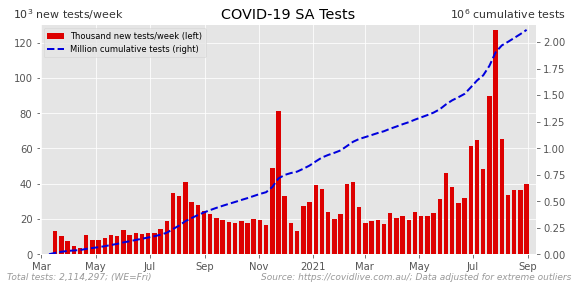

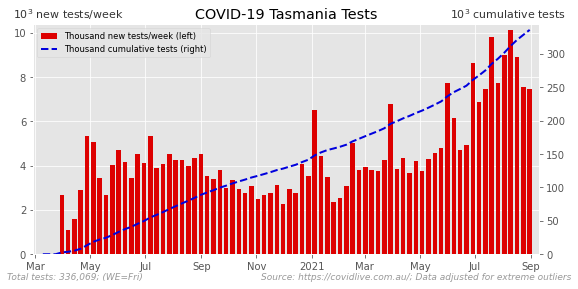

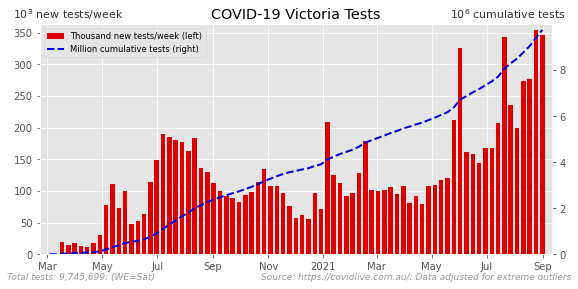

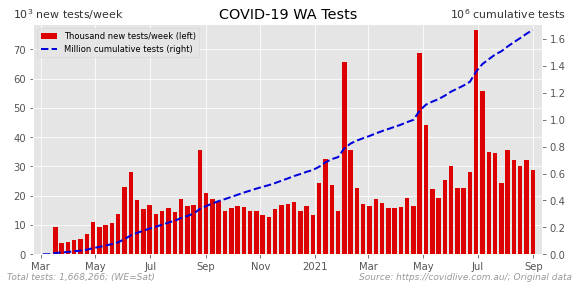

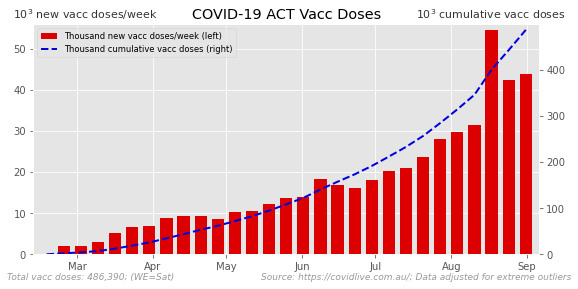

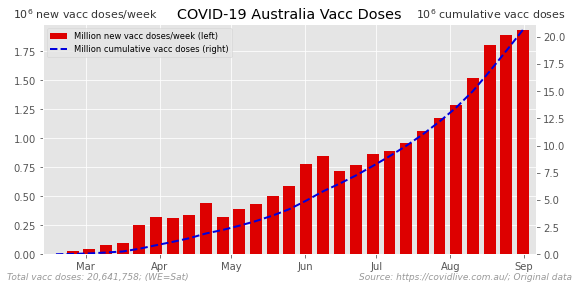

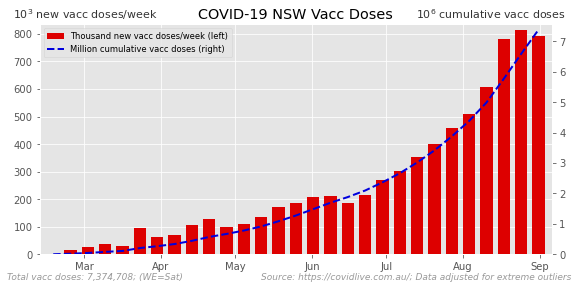

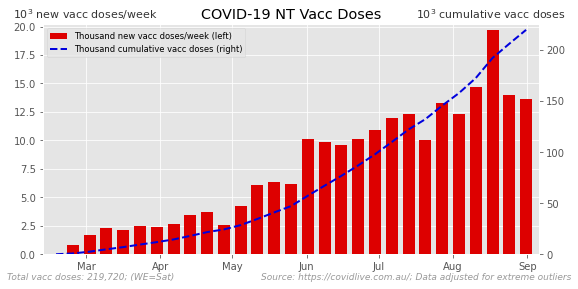

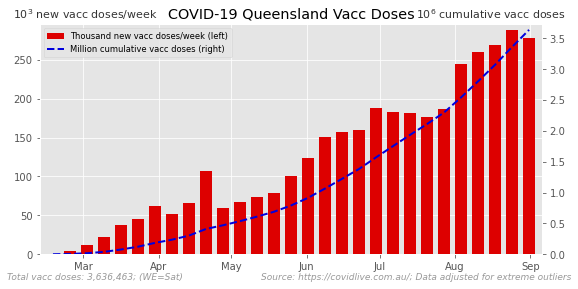

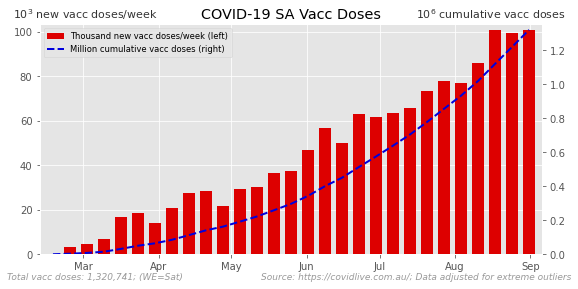

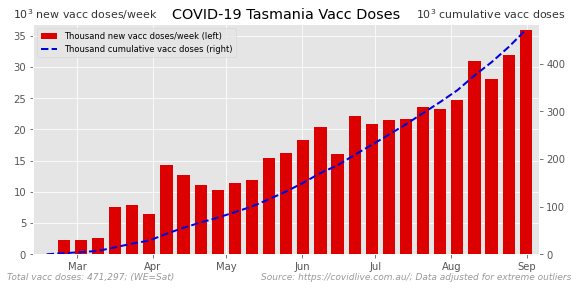

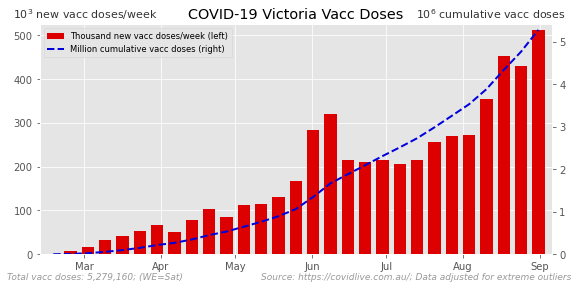

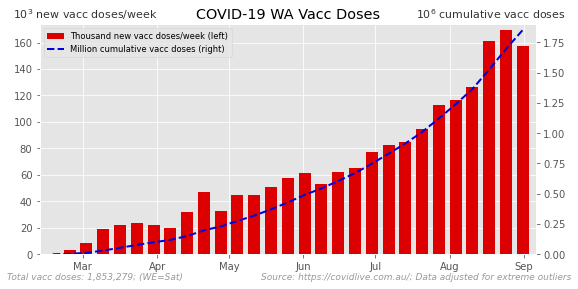

In [17]:
for item, desc in selected_cols.items():
    
    quality = pd.Series(dtype=str)
    for state in daily_u[item].columns:
        if (daily_u[item][state] == daily_c[item][state]).all():
            quality[state] = f'{SOURCE}; Original data'
        else:
            quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'
    
    
    daily = daily_c[item]
    ps.plot_weekly(
                   daily, desc, quality, 
                   chart_directory=CHART_DIRECTORY+'-!weekly-',
                   show=True,
                  )

## Bar Charts

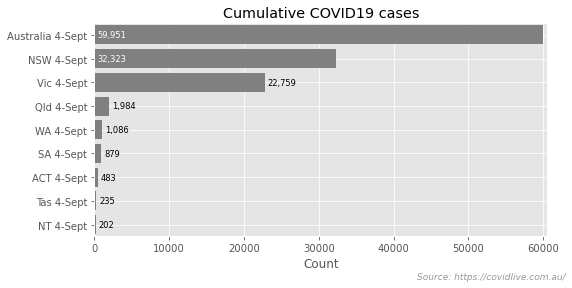

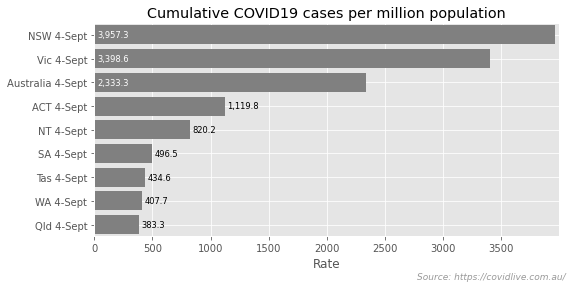

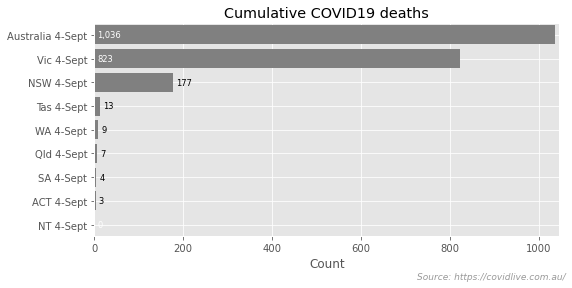

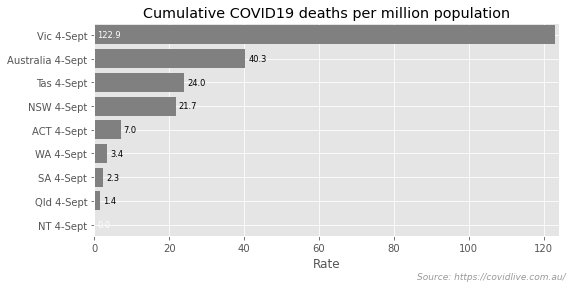

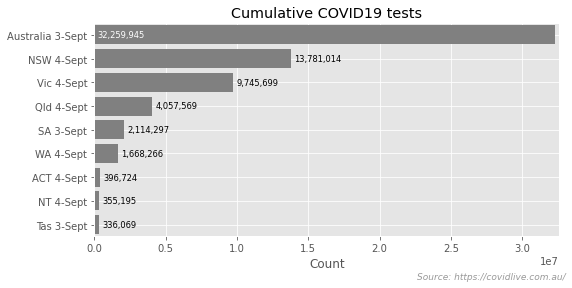

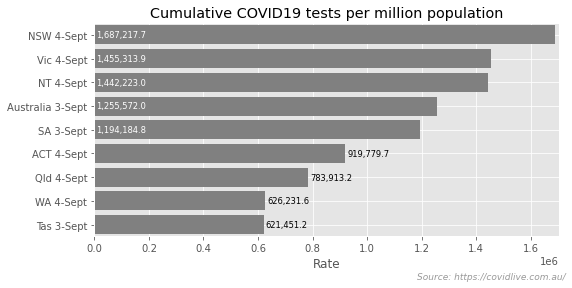

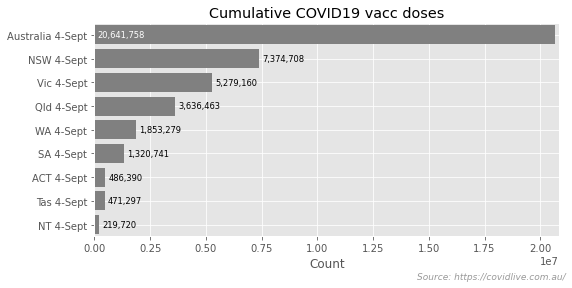

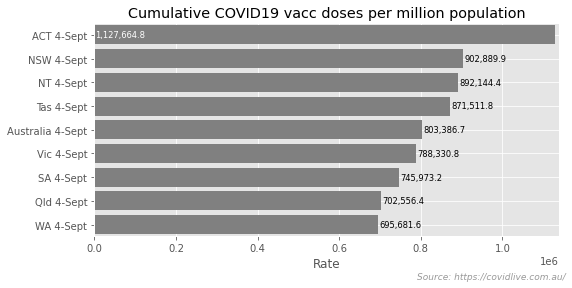

In [18]:
for item, desc in selected_cols.items():
    two_bar_plots(cum_u, item, 'Cumulative', desc)

## Active Cases

In [19]:
# capture active items, with nans where data is not up to date
item = 'ACTIVE_CNT'
active_all = get_item(item, raw_json_data)
active_all.tail()

Lastest value less than its predecessor in ACTIVE_CNT for ACT, WA


NAME           ACT  Australia      NSW   NT  Queensland   SA  Tasmania  \
REPORT_DATE                                                              
2021-08-31   242.0    19129.0  17999.0  2.0        23.0  3.0       0.0   
2021-09-01   256.0    20242.0  19040.0  2.0        23.0  3.0       0.0   
2021-09-02   258.0    21476.0  20150.0  2.0        19.0  5.0       0.0   
2021-09-03   255.0    22764.0  21296.0  2.0        18.0  3.0       0.0   
2021-09-04   239.0    24282.0  22705.0  3.0        20.0  5.0       0.0   

NAME         Victoria    WA  
REPORT_DATE                  
2021-08-31      841.0  19.0  
2021-09-01      900.0  18.0  
2021-09-02     1029.0  13.0  
2021-09-03     1180.0  10.0  
2021-09-04     1301.0   9.0

### Bar chart of active cases

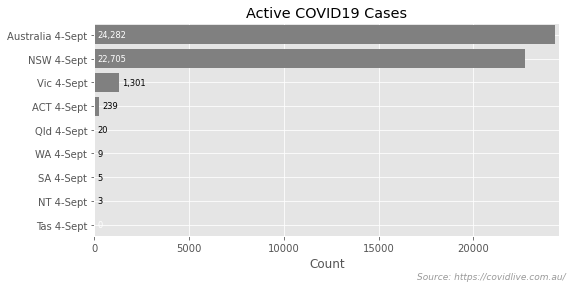

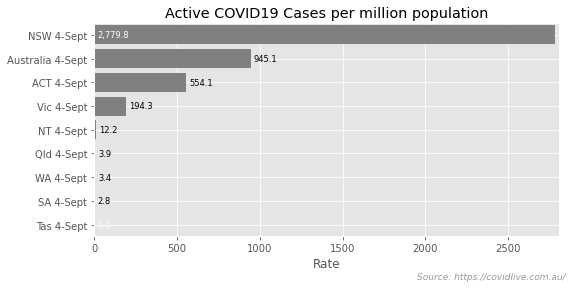

In [20]:
# bar chart of latest active cases, where data is complete
a_dict = {'active': active_all}
two_bar_plots(a_dict, 'active', 'Active', 'Cases')

### Active cases - line plots

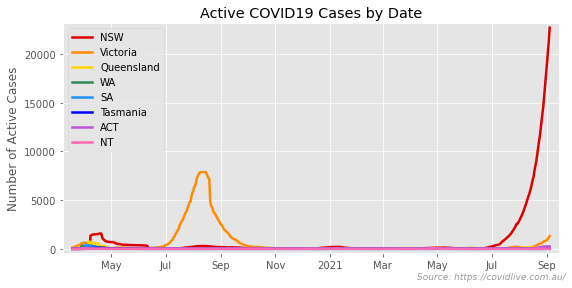

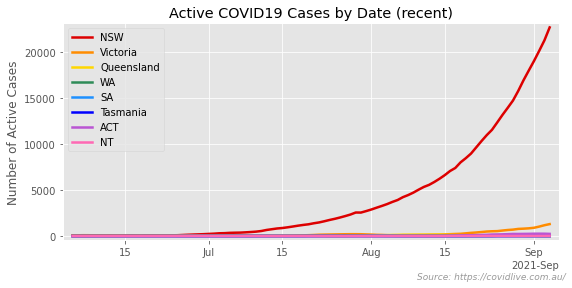

In [21]:
# line plots of trajectories
if 'Australia' in active_all.columns:
    del active_all['Australia']
    
line_plots(active_all, 'Active COVID19 Cases by Date',
           'Number of Active Cases')

## Source of infection

### Extraction

In [22]:
Australia = 'Australia'
names = {
    'SRC_OVERSEAS_CNT':   'Overseas',
    'SRC_INTERSTATE_CNT': 'Interstate',
    'SRC_CONTACT_CNT':    'Known contact',
    'SRC_UNKNOWN_CNT':    'Unknown contact',
    'SRC_INVES_CNT':      'Investigating',
}
# check we have all possible sources ...
assert((raw_json_data.columns.str[:3] == 'SRC').sum() == len(names))

In [23]:
def extract_soi(raw_json_data):

    # construct data for sources of infection
    soi_tables = {}
    for item in names.keys():
        table = get_item(item, raw_json_data)
        if Australia in table.columns: del table[Australia]
        soi_tables[names[item]] = table

    state_soi_tables = {}
    for state in state_pop.keys():
        if state == Australia: continue
        table = pd.DataFrame()
        for item in names.keys():
            table[names[item]] = soi_tables[names[item]][state]
        state_soi_tables[state] = table.dropna()

    soi_national = {}
    for key in soi_tables.keys():
        soi_national[key] = soi_tables[key].sum(axis=1)
    soi_national = pd.DataFrame(soi_national) 
    if soi_national.iloc[-1].sum() < soi_national.iloc[-2].sum():
        # last cumulative row incomplete
        soi_national = soi_national[:-1]

    return soi_tables, state_soi_tables, soi_national

In [24]:
soi_tables, state_soi_tables, soi_national = extract_soi(raw_json_data)

### Check latest raw SOI data against raw case count data

In [25]:
# WARN if penultimate and final SOI 
# totals do not match CASE_CNT table

def check_SOI():
    soi_cases = {name: x.sum(axis=1) 
                     for name, x in state_soi_tables.items()}
    soi_cases = pd.DataFrame(soi_cases)
    cases = cum_u['CASE_CNT'][soi_cases.columns] # ensure column order

    for check in (-1, -2):
        case_row = cases.diff().iloc[check]
        soi_row = soi_cases.diff().iloc[check]
        problematic = (
            (case_row != soi_row) 
            & soi_row.notna() 
            & case_row.notna()
        )
        if problematic.any():
            warn(f'CASE_CNT mismatch - check {"second " if check == -2 else ""} '
                 f'last line of the SOI tables for {fix[fix].index.values}')
            
            print('Latest cases data:')
            display(cases.diff().tail(4))
            print('Latest source of infection data:')
            display(soi_cases.diff().tail(4))

check_SOI()

### Plot national SOI 

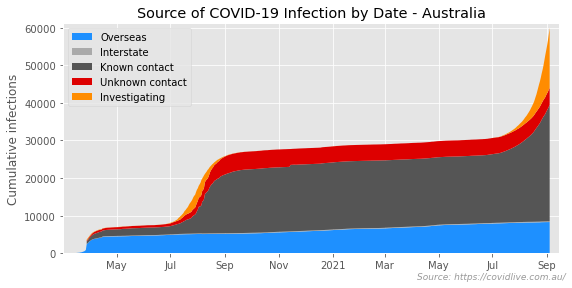

In [26]:
# plot time series of national totals
serious_colours = ['dodgerblue', '#aaaaaa', '#555555', '#dd0000', 'darkorange',]
assert(len(serious_colours) == len(names)) # check we have the right number of colours
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=serious_colours)

labels = list(names.values())
args = [soi_national[name] for name in labels]
fig, ax = plt.subplots()
ax.stackplot(soi_national.index, *args, labels=labels)
ax.legend(loc='upper left')

title = 'Source of COVID-19 Infection by Date - Australia'
ps.finalise_plot(ax, 
                 title=title, 
                 xlabel=None, 
                 ylabel='Cumulative infections',
                 **std_plot_settings,
                )

In [27]:
# extract the latest data, and under investigation
latest = pd.DataFrame()

for state in state_soi_tables.keys():
    latest[state] = state_soi_tables[state].iloc[-1]


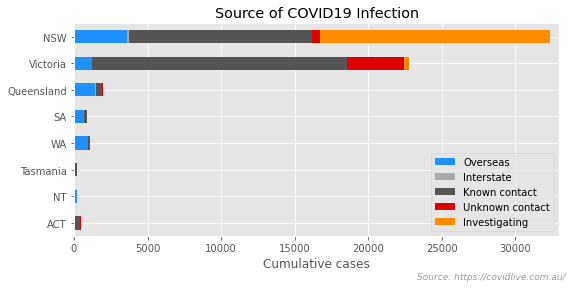

In [28]:
# plot the latest data
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=serious_colours)
ax = latest.T[::-1].plot.barh(stacked=True)
title = 'Source of COVID19 Infection'
ps.finalise_plot(ax, 
                 title=title, 
                 xlabel='Cumulative cases', 
                 ylabel=None,
                 **std_plot_settings,
                )

### Plot cases under investigation by state

In [29]:
under_investigation = soi_tables['Investigating']

# These are running totals (and will go up and down)
under_investigation.tail()

NAME          ACT      NSW   NT  Queensland   SA  Tasmania  Victoria   WA
REPORT_DATE                                                              
2021-08-31    3.0  11753.0  0.0         0.0  0.0       0.0      87.0  0.0
2021-09-01    9.0  12476.0  0.0         0.0  0.0       0.0     122.0  0.0
2021-09-02   12.0  13432.0  0.0         0.0  0.0       0.0     208.0  0.0
2021-09-03   17.0  14453.0  0.0         0.0  0.0       0.0     297.0  0.0
2021-09-04   17.0  15582.0  0.0         0.0  0.0       0.0     357.0  0.0

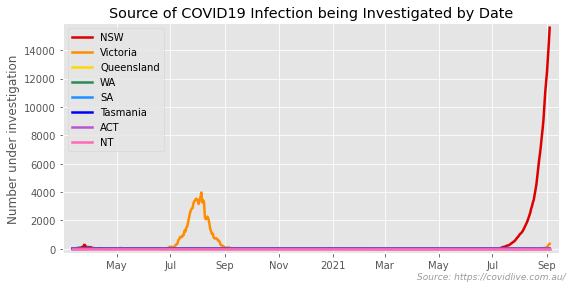

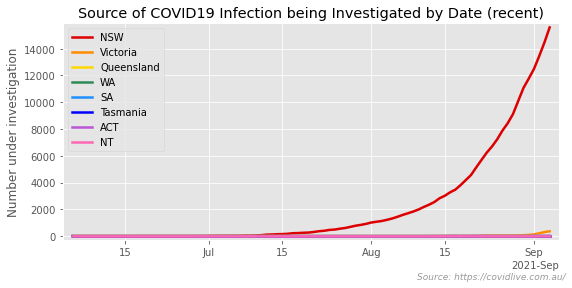

In [30]:
line_plots(under_investigation, 
           'Source of COVID19 Infection being Investigated by Date',
           'Number under investigation',
          )

## Local cases/transmission

### Create dataframe of local transmission

In [31]:
# calculate raw data from from Sourse of Infection data collected above
local_trans = list(names.values()) # names dictionary defined above
local_trans.remove('Overseas')

def get_local_trans():
    local_trans_d = {}
    for state in state_soi_tables.keys():
        local_trans_d[state] = state_soi_tables[state][local_trans].sum(axis=1)
    local_trans_df = pd.DataFrame(local_trans_d)
    return local_trans_df

In [32]:
local_trans_df = get_local_trans()
local_nan_map = local_trans_df.isna()

# check raw data - most recent cumulative totals
local_trans_df.tail(5)

NSW  Victoria  Queensland     SA     WA  Tasmania    NT  \
REPORT_DATE                                                                
2021-08-31   23397.0   20851.0       523.0  215.0  115.0     150.0  15.0   
2021-09-01   24497.0   20967.0       523.0  215.0  115.0     150.0  15.0   
2021-09-02   25777.0   21141.0       524.0  217.0  115.0     150.0  15.0   
2021-09-03   27192.0   21349.0       524.0  217.0  115.0     150.0  15.0   
2021-09-04   28707.0   21538.0       525.0  217.0  115.0     150.0  15.0   

               ACT  
REPORT_DATE         
2021-08-31   303.0  
2021-09-01   326.0  
2021-09-02   338.0  
2021-09-03   356.0  
2021-09-04   388.0

In [33]:
# check raw data - most recent daily new cases
local_trans_df.diff().tail()

NSW  Victoria  Queensland   SA   WA  Tasmania   NT   ACT
REPORT_DATE                                                             
2021-08-31   1147.0      75.0         0.0  0.0  0.0       0.0  0.0  13.0
2021-09-01   1100.0     116.0         0.0  0.0  0.0       0.0  0.0  23.0
2021-09-02   1280.0     174.0         1.0  2.0  0.0       0.0  0.0  12.0
2021-09-03   1415.0     208.0         0.0  0.0  0.0       0.0  0.0  18.0
2021-09-04   1515.0     189.0         1.0  0.0  0.0       0.0  0.0  32.0

In [34]:
# make the usual adjustments
LOCAL = 'LOCAL_TRANS'

# the next step assumes the data for today is fully updated.
# but if not, we roll forward yesterday's numbers so that
# the cumulative bar charts (below) are complete.
cum_u[LOCAL] = (
    local_trans_df
    .sort_index(ascending=True)
)

daily_u[LOCAL], daily_c[LOCAL], cum_c[LOCAL] = (
    ps.dataframe_correction(cum_u[LOCAL], verbose=False)
)

In [35]:
# What does the most recent data look like when adjusted ...
daily_c[LOCAL].iloc[-5:]

NSW  Victoria  Queensland   SA   WA  Tasmania   NT   ACT
REPORT_DATE                                                             
2021-08-31   1147.0      75.0         0.0  0.0  0.0       0.0  0.0  13.0
2021-09-01   1100.0     116.0         0.0  0.0  0.0       0.0  0.0  23.0
2021-09-02   1280.0     174.0         1.0  2.0  0.0       0.0  0.0  12.0
2021-09-03   1415.0     208.0         0.0  0.0  0.0       0.0  0.0  18.0
2021-09-04   1515.0     189.0         1.0  0.0  0.0       0.0  0.0  32.0

### Bar charts cumulative local transmission

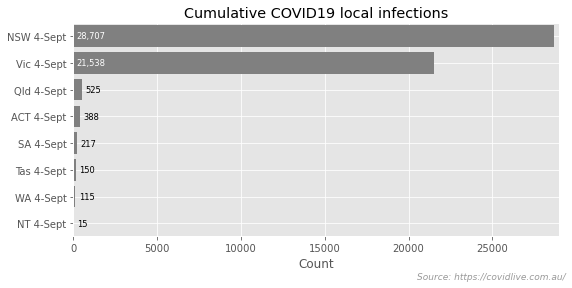

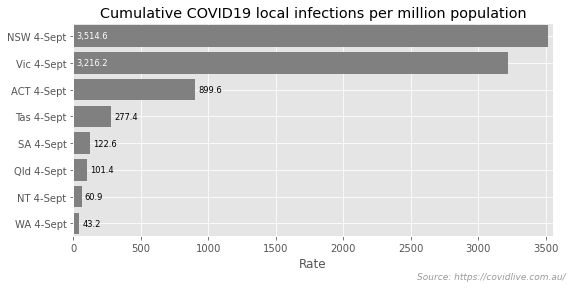

In [36]:
two_bar_plots(cum_u, LOCAL, 'Cumulative', 'local infections')

### Weekly charts for local transmission

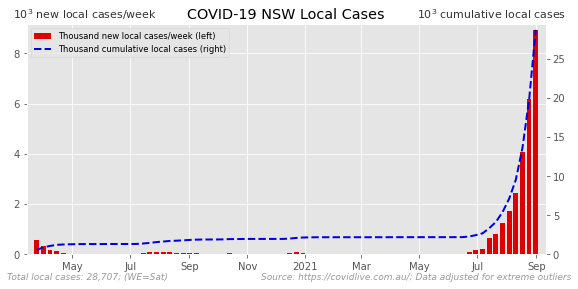

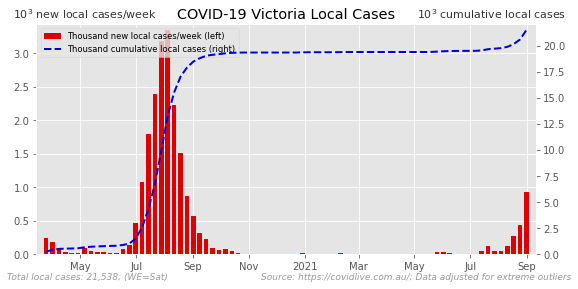

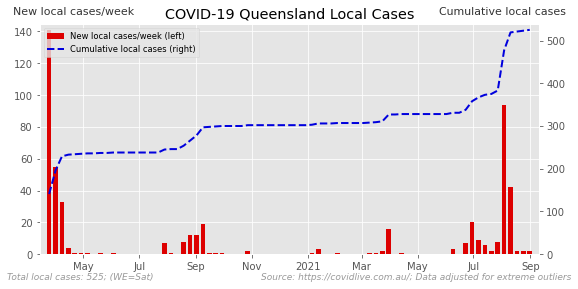

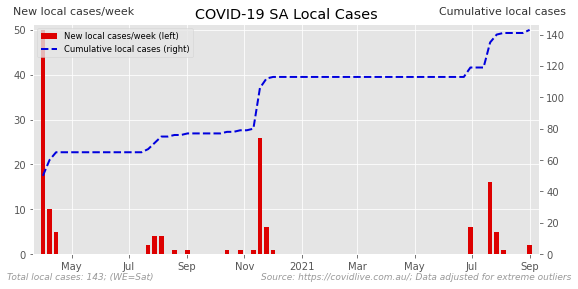

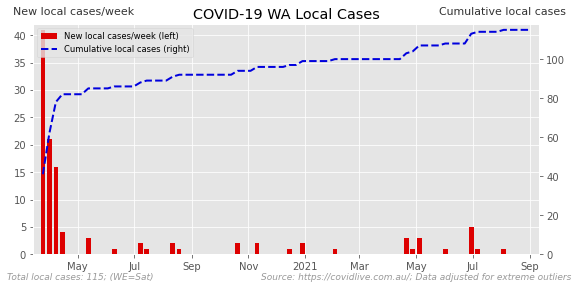

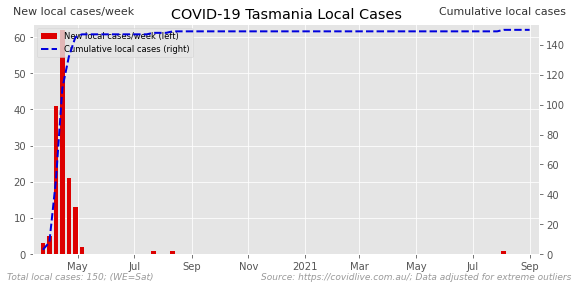

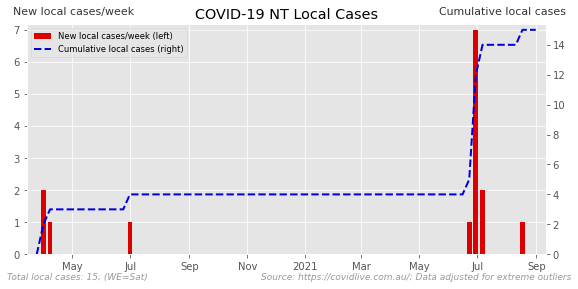

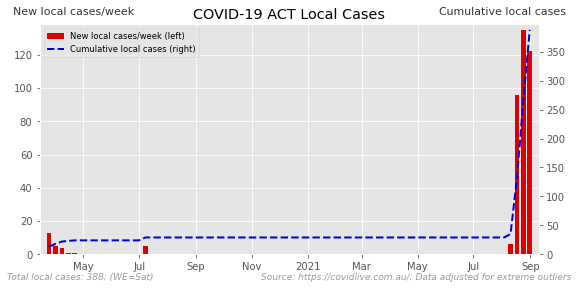

In [37]:
quality = pd.Series(dtype=str)
for state in daily_u[LOCAL].columns:
    if (daily_u[LOCAL][state] == daily_c[LOCAL][state]).all():
        quality[state] = f'{SOURCE}; Original data'
    else:
        quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'

desc = 'local cases'
ps.plot_weekly(
    daily_c[LOCAL], desc, quality, 
    chart_directory=f'{CHART_DIRECTORY}-!{desc}-',
    show=True,
)

### Recent local transmission daily charts

In [38]:
local_lfooter = f'Local = {" + ".join(local_trans)}'

def recent_bar_with_ma_plot(df, mode):
    """plotting function - bar charts for daily local transmission,
       with 7 and 14 day moving averages."""
    
    # establish moving average periods
    MA1 = 7 # days
    MA2 = 14 # dats
    
    for col in df.columns:
        series = df[col]
        
        # bail if nothing to plot
        if series[-RECENT:].sum() <= 0: 
            continue
            
        # get plotables for recent period
        ma1 = series.rolling(MA1).mean()[-RECENT:]
        ma2 = series.rolling(MA2).mean()[-RECENT:]
        series = series[-RECENT:]
        
        # plot
        fig, ax = plt.subplots()
        ax.xaxis_date()
        ax.bar(series.index, series, label=mode, 
               color='#dd0000')
        ax.plot(ma1.index, ma1, label=f'{MA1} day ave.', 
                color='darkorange', lw=2.5)
        ax.plot(ma2.index, ma2, label=f'{MA2} day ave.', 
                color='cornflowerblue', lw=2.5)
        
        # annotate / finalise plot
        ax.legend(loc='best')
        title = (f'New Locally Acquired COVID19 {mode.title()} '
                 f'in {col} - Recent')
        ax.figure.text(x=0.01, y=0.99, 
                       s=f'Period total: {series.sum():,.0f}',
                       ha='left', va='top',
                       fontsize=9, fontstyle='italic',
                       color='#999999')
        ps.finalise_plot(ax, 
                         title=title, 
                         xlabel=None,
                         ylabel=f'Daily New {mode.title()}',
                         lfooter=local_lfooter,
                         **std_plot_settings,
                        )

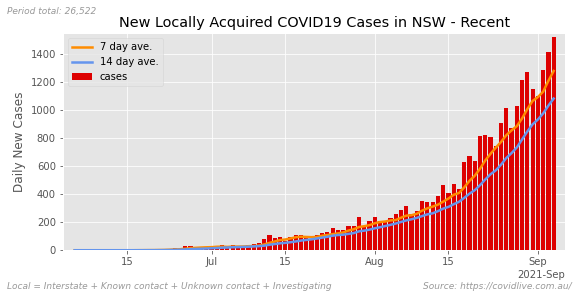

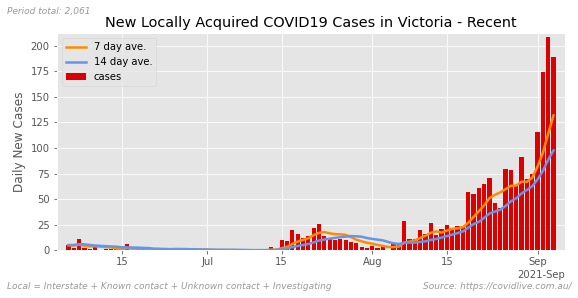

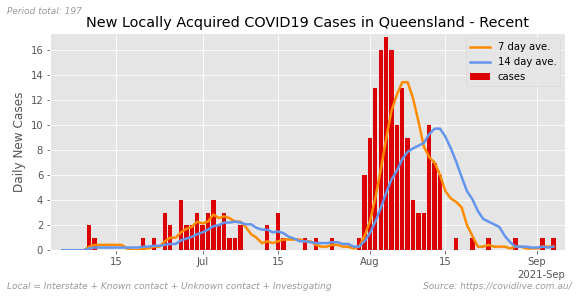

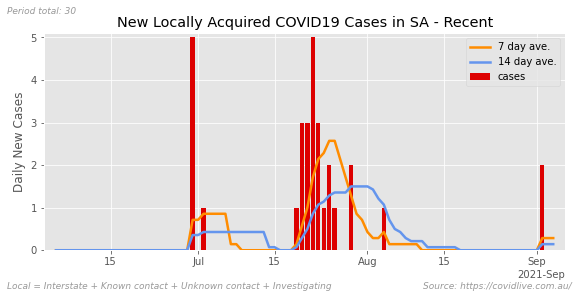

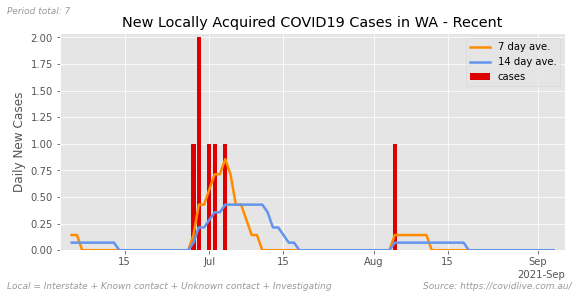

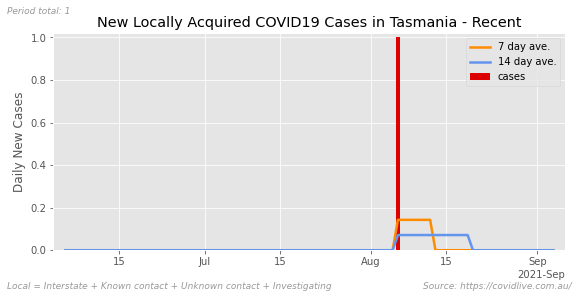

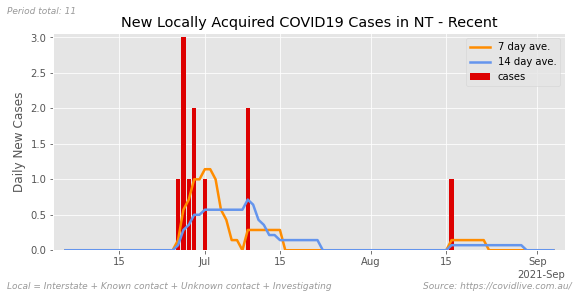

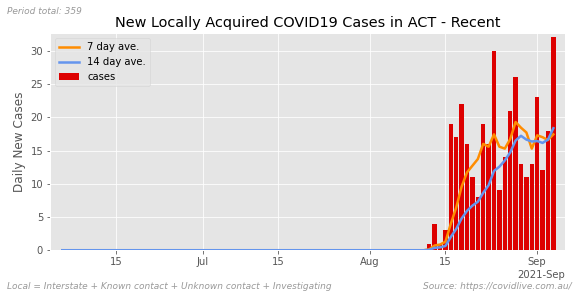

In [39]:
# and plot it
recent_bar_with_ma_plot(daily_c[LOCAL], "cases")

## Local outbreaks

Note: requires the SOI data for today to be updated.

### Supporting functions

In [40]:
def get_local_daily(state, start=None, stop=None):
    """Get local series for state. If specified, 
       limite the length of the series selected."""
    
    series = daily_c[LOCAL][state].dropna()
    
    if start:
        series = series[series.index >= pd.Timestamp(start)]

    if stop:
        if type(stop) == int:
            series = series.iloc[:stop]
        if type(stop) == str:
            series = series[series.index <= pd.Timestamp(stop)]

    return series

### Named outbreaks

In [41]:
# outbreaks:
# focusing on those after April 2020, 
# that last more than 21 days, 
# that have more than 100 cases in total,
# starting from the last zero-new-cases day of the outbreak

NSW_2020_Crossroads = {
    'NSW 08-Jul-20 (Crossroads)':   ['NSW',        '2020-07-08', 120],
}

NSW_2020_Avalon = {
    'NSW 16-Dec-20 (Avalon)':       ['NSW',        '2020-12-16', 120],
}

NSW_2021_Bondi = {
    'NSW 16-Jun-21 (Bondi-Delta)':  ['NSW',        '2021-06-16',  None, ],
}

Vic_2020_wave2 = {
    'Vic 09-Jun-20 (2nd Wave)':     ['Victoria',   '2020-06-09',    100],
}

Vic_2021_Wollert = {
    'Vic 24-May-21 (Wollert)':      ['Victoria',   '2021-05-24', 36],
}

Vic_2021_Delta = {
    'Vic 04-Aug-21 (Delta)':        ['Victoria',   '2021-08-04',  None, ],    
}

Qld_2021_Delta = {
    'Qld 29-Jul-21 (Delta)':        ['Queensland', '2021-07-29',  40, ],     
}

ACT_2021_Delta = {
    'ACT 11-Aug-21 (Delta)':           ['ACT',        '2021-08-11',  None, ], 
}

older = {
    'Qld Jun-21':  ['Queensland', '2021-06-19',  40, ],
    'NT Jun-21':   ['NT',         '2021-06-25',  40, ],
    'WA Jun-21':   ['WA',         '2021-06-27',  40, ],  
    'SA Jun-21':   ["SA",         '2021-06-29',  16, ],
}

Older_outbreaks = {
    **NSW_2020_Crossroads,
    **NSW_2020_Avalon,
    **NSW_2021_Bondi,
    **Vic_2020_wave2,
    **Vic_2021_Wollert,
    **Vic_2021_Delta,
    **Qld_2021_Delta,
    **ACT_2021_Delta,
}

Current_outbreaks = {
    **NSW_2021_Bondi,
    **Vic_2021_Delta,
    **ACT_2021_Delta,
}

Vic_2020_vs_Delta = {
    **Vic_2020_wave2,
    **Current_outbreaks,
}

In [42]:
def plot_outbreaks(outbreaks, colours, span_days=100, **kwargs):

    serieses = {}
    tag = []
    for label, (state, start_date, reduced_span) in outbreaks.items():
        tag.append(state)
        span = reduced_span if reduced_span and reduced_span < span_days else span_days
        serieses[label] = get_local_daily(state, start=start_date, stop=span).reset_index(drop=True)
    outbreak_df = pd.DataFrame(serieses)

    # check day zero is zero, and day one is more than zero
    print(f'Checking: \n{outbreak_df.iloc[0:3]}')
    assert( (outbreak_df.iloc[0] == 0).all() )
    assert( (outbreak_df.iloc[1] > 0).all() )
    
    datasets = [outbreak_df, outbreak_df.cumsum()]
    ylabels =  ['New cases on day', 'Cumulative new cases']
    for ylabel, data in zip(ylabels, datasets):
        ax = data.plot(color=colours, lw=2.5)
        
        # add Henderson moving averages if we have enough data
        MA_TERM = 13 # must be odd
        if ylabel == ylabels[0] and len(data) >= MA_TERM:
            hma = pd.DataFrame()
            for col in data.columns:
                input_ = data[col].dropna()
                if len(input_) >= MA_TERM:
                    hma[col] = Henderson.Henderson(input_, MA_TERM)
            if not hma.empty:
                hma.columns = hma.columns + ' moving ave.'
                hma.plot(color=colours, lw=1, ls='-.', ax=ax, label=None)
            ax.legend(ncol=1, prop={'size': 8})

        # and finalise the plot
        if "title" not in kwargs:
            kwargs["title"] = 'Local Outbreak' + ('s' if len(data.columns) > 1 else '')
            kwargs["title"] = kwargs["title"] + ': ' + ", ".join(data.columns)
            if len(kwargs["title"]) > 60:
                kwargs["title"] = 'Local Outbreaks'
            
        ps.finalise_plot(ax,
            ylabel=ylabel,
            xlabel=f'Day of the outbreak',
            save_tag=f'-{ylabel.split()[0]}-{"-".join(tag)}',
            lfooter='Day zero is the last zero new cases day before new cases.',
            **kwargs, 
            **std_plot_settings,
        )



Checking: 
   NSW 16-Jun-21 (Bondi-Delta)  Vic 04-Aug-21 (Delta)  ACT 11-Aug-21 (Delta)
0                          0.0                    0.0                    0.0
1                          2.0                    7.0                    1.0
2                          2.0                    6.0                    4.0


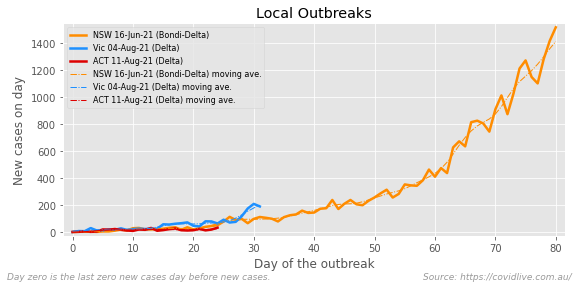

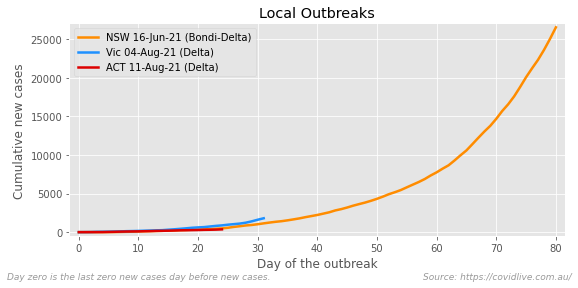

Checking: 
   Vic 09-Jun-20 (2nd Wave)  NSW 16-Jun-21 (Bondi-Delta)  \
0                       0.0                          0.0   
1                       4.0                          2.0   
2                       8.0                          2.0   

   Vic 04-Aug-21 (Delta)  ACT 11-Aug-21 (Delta)  
0                    0.0                    0.0  
1                    7.0                    1.0  
2                    6.0                    4.0  


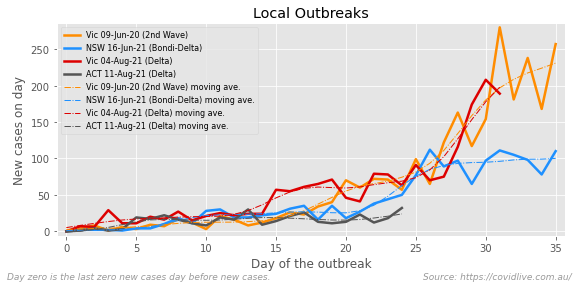

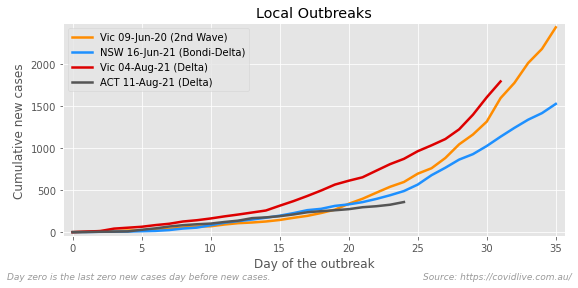

In [43]:
colours = ['darkorange', 'dodgerblue', '#dd0000', '#555555', 
           'royalblue', 'orchid', 'darkred']
plot_outbreaks(Current_outbreaks, colours)
plot_outbreaks(Vic_2020_vs_Delta, colours, span_days=36)

### Outbreaks on a log scale

Note, our regression model is
$$
\begin{align*}
ln(y) & = b + kt\\
y & = e^{(b + kt)}\\
y & = e^b*e^{kt}\\
y & = ae^{kt}\\
\end{align*}
$$
The doubling time ...
$$
\begin{align*}
2a & = ae^{kt}\\
2 & = e^{kt}\\
ln(2) & = kt\\
t & = \frac{ln(2)}{k}\\
\end{align*}
$$

In [44]:
import statsmodels.api as sm
def get_exp_regression(series):
    """Get a predicted regression line and formula for plotting
       a line through exponential data
       Returns None if input data is problematic"""
    
    # sanity checks
    if (probs := (series <= 0) | series.isna()).any(): 
        probs = probs[probs].index.strftime("%Y-%m-%d")
        warn(f'Cannot do log regression for {name} as '
             f'there is bad data for dates: {probs}')
        return None 
    
    # index to an integer series starting at t=0
    log_series = np.log(series).reset_index(drop=True)
    
    # Stats model
    x = sm.add_constant(log_series.index.values, prepend=False)
    log_y = log_series.values
    model = sm.OLS(log_y, x)
    results = model.fit()
    #print(results.summary())
    y_predicted = np.exp(results.predict(x)) # in-sample prediction
    m, b = results.params
    a = np.exp(b)
    formula = f'$y={a:,.1f}e^' '{' f'{m:,.4f}t' '}$'
    
    return pd.Series(y_predicted, index=series.index), formula, m, a

In [45]:
def log_regression_plot(name, state, start, stop, 
                        tail=0.75, final_oos=0, forward=7):
    """plot an exponential regression line through the tail (fraction)
       of the data using with both a linear and log y-axis. 
       An out-of-sample projection plot can be provided for the very final 
       set of data points (number) if needed, useful for checking if trend 
       is bending away from exponential *OR* a forward projection can be made
       on the linear plot (only)."""

    # sanity checks
    if final_oos < 0 or final_oos == 1: return None
    if forward < 0 or forward == 1: return None
    
    # get data points
    data = get_local_daily(state, start, stop).iloc[1:] # ignore initial zero day
    print(f'Outbreak period {name}: {len(data)} days')
    
    # regression line through last portion of the data
    final_data = int(len(data) * tail)
    final_data = data.iloc[-final_data:-final_oos] if final_oos > 0 else data.iloc[-final_data:]
    result = get_exp_regression(final_data)
    if result is None: return None
    y_pred, formula, m, a = result
    if len(y_pred) < 2: return None

    # plot log scale and linear scale charts
    for approach in 'log', 'linear':
        title = f'Daily New Cases {name}'
        ylabel = 'Daily new cases'
        fig, ax = plt.subplots()
        ax.scatter(data.index, data, label='Daily new cases')
        ax.plot(y_pred.index, y_pred, 
            lw=2.5, 
            label=formula,
            color='dodgerblue',)
    
        # log or linear scale ...
        if approach == 'log':
            ax.set_yscale('log')
            title += ', log scale'
            ylabel += ' (log scale)'

        # out of sample projection
        if final_oos > 0 and forward == 0:
            t = range(len(y_pred), len(y_pred)+final_oos)
            out_of_sample = a * np.exp(m * t)
            print(f'Out-ofsample: \n{out_of_sample}')
            ax.plot(data.index[-final_oos:], out_of_sample,
               lw=2.5,
               label='Out of sample projection',
               ls=':',
               color='darkblue',)
            title += f', OOS={final_oos}-days'
            
        # forward projection
        if approach == 'linear' and forward > 0 and final_oos == 0:
            t = range(len(y_pred), len(y_pred)+forward)
            projection = a * np.exp(m * t)
            dates = [y_pred.index[0] + pd.Timedelta(days=x) for x in t]
            print(f'Projection: \n{projection}')
            print(f'Tally: {data.sum() + projection.sum()}')
            ax.plot(dates, projection,
               lw=2.5,
               label=f'{forward}-day projection',
               ls=':',
               color='darkblue',)
            title += f', FP={forward}-days'

        # finalise plot
        legend = ax.legend(loc='best')
        ps.finalise_plot(
            ax,
            title=title,
            ylabel=ylabel,
            xlabel=None,
            lfooter=f'Line of best fit through final {100*tail:.0f}% of data points: '
                    f'Implied doubling time: {np.log(2)/m:.2f} days.',
            **std_plot_settings,
        )

NSW 16-Jun-21 (Bondi-Delta)
Outbreak period NSW 16-Jun-21 (Bondi-Delta): 80 days
Out-ofsample: 
[1227.72421251 1301.98980043 1380.74774705 1464.26979716 1552.84413352]


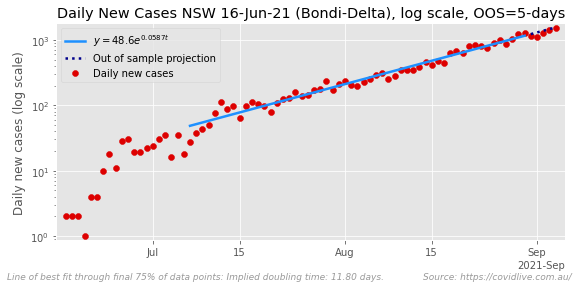

Out-ofsample: 
[1227.72421251 1301.98980043 1380.74774705 1464.26979716 1552.84413352]


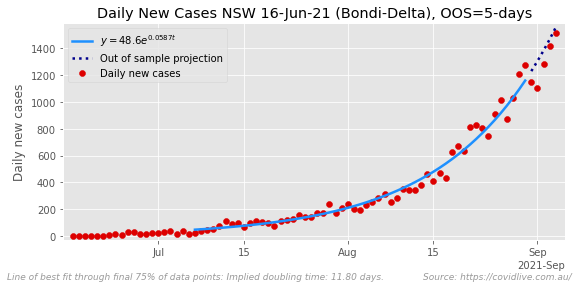

Outbreak period NSW 16-Jun-21 (Bondi-Delta): 80 days


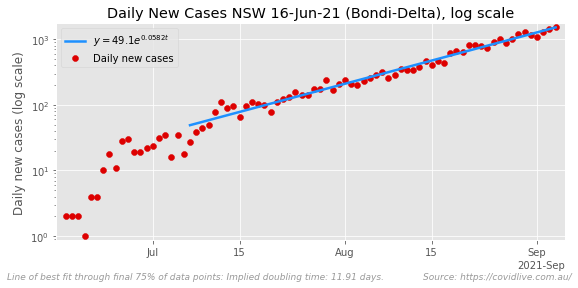

Projection: 
[1609.14355256 1705.53439884 1807.69924536 1915.98396602 2030.75515325
 2152.40135908 2281.33441059]
Tally: 40024.85208568953


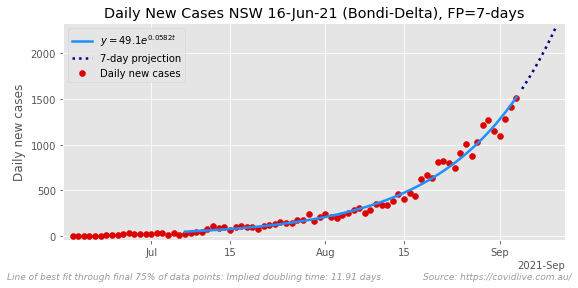

Outbreak period NSW 16-Jun-21 (Bondi-Delta): 80 days


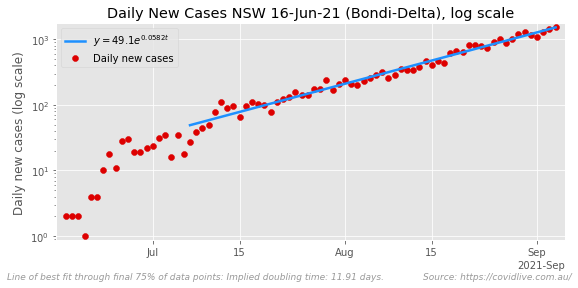

Projection: 
[1609.14355256 1705.53439884 1807.69924536 1915.98396602 2030.75515325
 2152.40135908 2281.33441059 2417.99080408 2562.83318283 2716.35190339
 2879.06669559 3051.52842211 3234.32094338 3428.06309423 3633.41077886
 3851.05919147 4081.74516972 4326.24968928 4585.40050781 4860.07496728
 5151.20296413 5459.77009743 5786.82100558 6133.46290284 6500.86932778
 6890.28411622 7303.02561218 7740.49113107 8204.16169023 8695.60702282]
Tally: 153518.64330601454


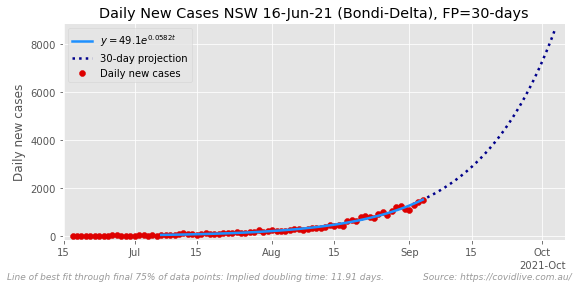

Outbreak period NSW 16-Jun-21 (Bondi-Delta): 80 days


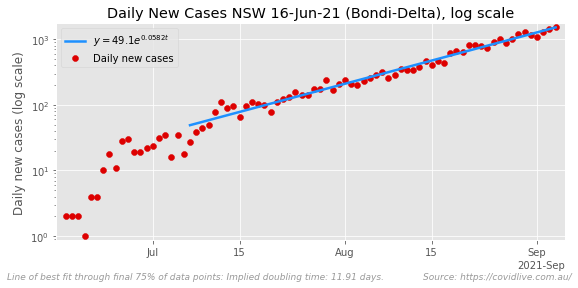

Projection: 
[ 1609.14355256  1705.53439884  1807.69924536  1915.98396602
  2030.75515325  2152.40135908  2281.33441059  2417.99080408
  2562.83318283  2716.35190339  2879.06669559  3051.52842211
  3234.32094338  3428.06309423  3633.41077886  3851.05919147
  4081.74516972  4326.24968928  4585.40050781  4860.07496728
  5151.20296413  5459.77009743  5786.82100558  6133.46290284
  6500.86932778  6890.28411622  7303.02561218  7740.49113107
  8204.16169023  8695.60702282  9216.4908921   9768.576724
 10353.73357711 10973.94247029 11631.3030893  12328.04089518
 13066.51465846 13849.22444461 14678.82007794 15558.11011239
 16490.07133979 17477.85886764 18524.81680051 19634.48956142
 20810.63389122 22057.23156692 23378.50288173 24778.92093271
 26263.22676417 27836.44541823 29503.90294689 31271.24444306
 33144.45315177 35129.87072614 37234.21869668 39464.62122677
 41828.62923108 44334.24593884 46989.95398839 49804.74414468]
Tally: 880901.4827660305


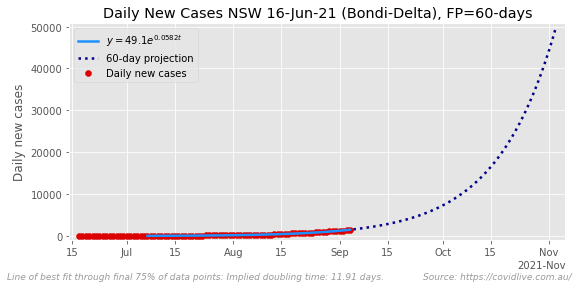

Vic 04-Aug-21 (Delta)
Outbreak period Vic 04-Aug-21 (Delta): 31 days


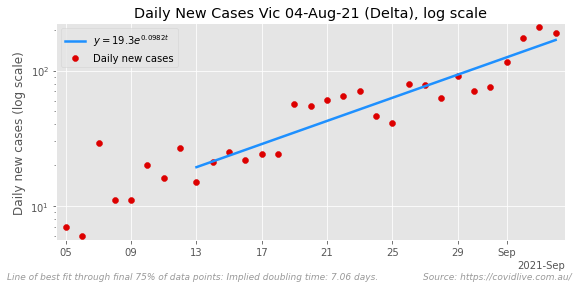

Projection: 
[185.35573168 204.49023118 225.60000853 248.88897408 274.5820881
 302.9275338  334.19911462]
Tally: 3573.0436819846427


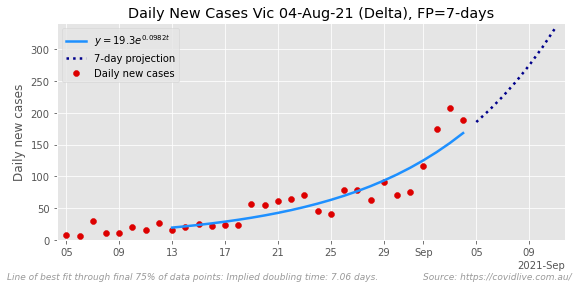

Outbreak period Vic 04-Aug-21 (Delta): 31 days


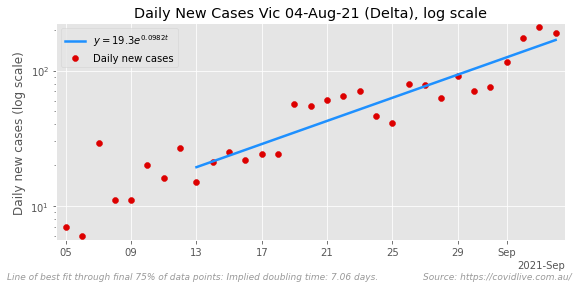

Projection: 
[ 185.35573168  204.49023118  225.60000853  248.88897408  274.5820881
  302.9275338   334.19911462  368.69889907  406.76013859  448.75048653
  495.0755496   546.18280573  602.56592659  664.76954617  733.39452168
  809.10373757  892.62850866  984.77564431 1086.43524178 1198.58928416
 1322.32112589 1458.82595738 1609.42235003 1775.56499298 1958.85874472
 2161.07413524 2384.16446851 2630.28469047 2901.81220479 3201.36983741]
Tally: 34214.47247983556


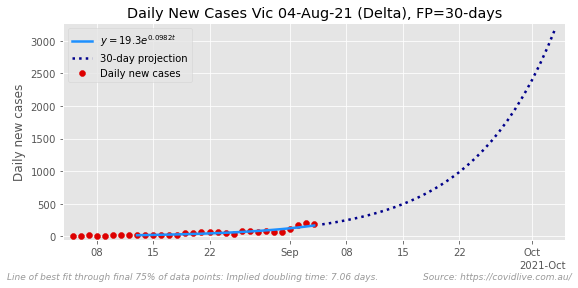

Outbreak period Vic 04-Aug-21 (Delta): 31 days


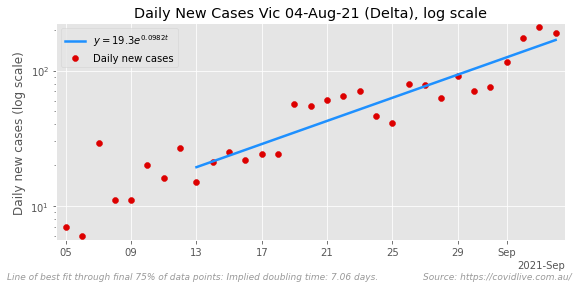

Projection: 
[  185.35573168   204.49023118   225.60000853   248.88897408
   274.5820881    302.9275338    334.19911462   368.69889907
   406.76013859   448.75048653   495.0755496    546.18280573
   602.56592659   664.76954617   733.39452168   809.10373757
   892.62850866   984.77564431  1086.43524178  1198.58928416
  1322.32112589  1458.82595738  1609.42235003  1775.56499298
  1958.85874472  2161.07413524  2384.16446851  2630.28469047
  2901.81220479  3201.36983741  3531.85117181  3896.44849965
  4298.68365679  4742.44204248  5232.01015055  5772.1169748
  6367.9796889   7025.35404173  7750.58995519  8550.6928614
  9433.39137186 10407.21193206 11481.56118297 12666.81682461
 13974.4278597  15417.02518557 17008.54360256 18764.35641753
 20701.42394269 22838.45732403 25196.09928214 27797.12351095
 30666.65466073 33832.41103022 37324.97231215 41178.07497841
 45428.93815826 50118.62315733 55292.43009017 61000.33545773]
Tally: 651911.5198048255


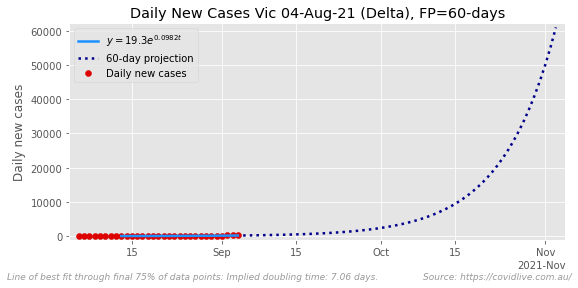

ACT 11-Aug-21 (Delta)
Outbreak period ACT 11-Aug-21 (Delta): 24 days


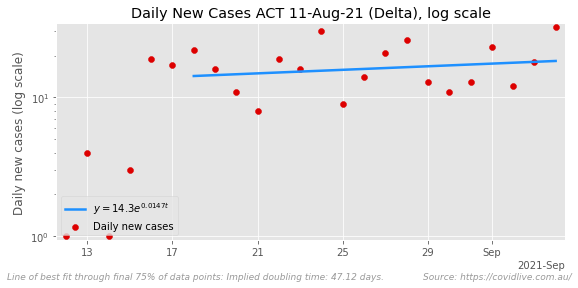

Projection: 
[18.60071855 18.87633511 19.15603562 19.43988059 19.72793145 20.0202505
 20.316901  ]
Tally: 495.1380528152472


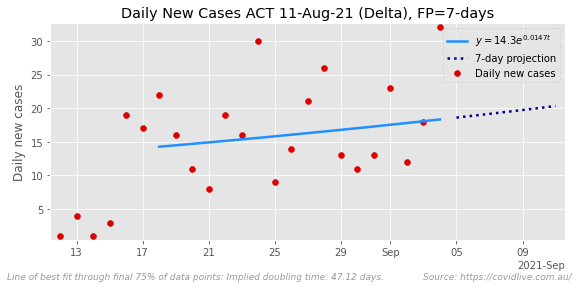

Outbreak period ACT 11-Aug-21 (Delta): 24 days


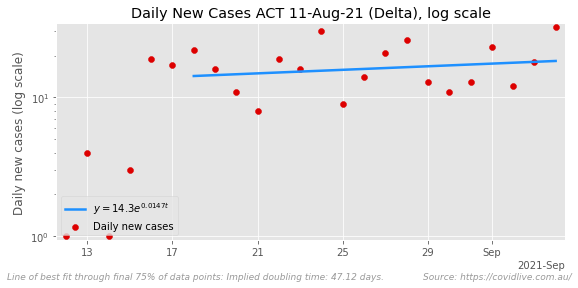

Projection: 
[18.60071855 18.87633511 19.15603562 19.43988059 19.72793145 20.0202505
 20.316901   20.61794712 20.92345401 21.23348774 21.54811541 21.86740508
 22.19142583 22.52024777 22.85394203 23.19258082 23.53623739 23.8849861
 24.2389024  24.59806287 24.9625452  25.33242826 25.70779207 26.08871784
 26.47528799 26.86758614 27.26569719 27.66970725 28.07970374 28.49577537]
Tally: 1055.2900884459145


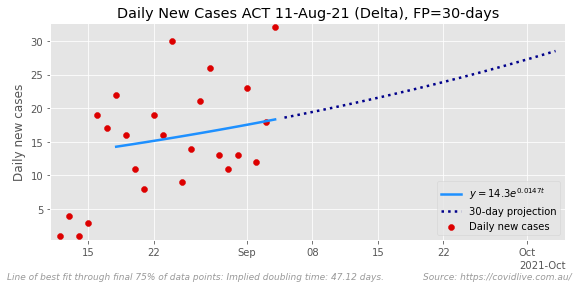

Outbreak period ACT 11-Aug-21 (Delta): 24 days


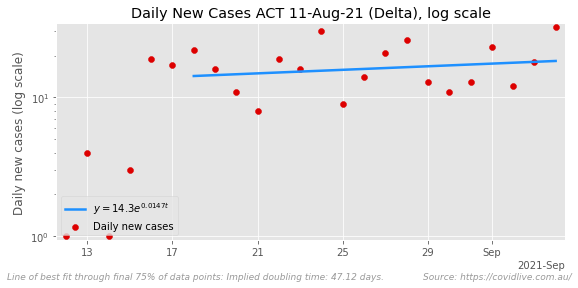

Projection: 
[18.60071855 18.87633511 19.15603562 19.43988059 19.72793145 20.0202505
 20.316901   20.61794712 20.92345401 21.23348774 21.54811541 21.86740508
 22.19142583 22.52024777 22.85394203 23.19258082 23.53623739 23.8849861
 24.2389024  24.59806287 24.9625452  25.33242826 25.70779207 26.08871784
 26.47528799 26.86758614 27.26569719 27.66970725 28.07970374 28.49577537
 28.91801214 29.34650542 29.7813479  30.22263367 30.67045821 31.12491839
 31.58611255 32.05414046 32.52910339 33.01110409 33.50024684 33.99663748
 34.5003834  35.01159358 35.53037863 36.0568508  36.59112397 37.13331375
 37.68353743 38.24191407 38.80856447 39.38361122 39.96717874 40.55939328
 41.16038298 41.77027785 42.38920986 43.0173129  43.65472287 44.30157768]
Tally: 2137.7926364680825


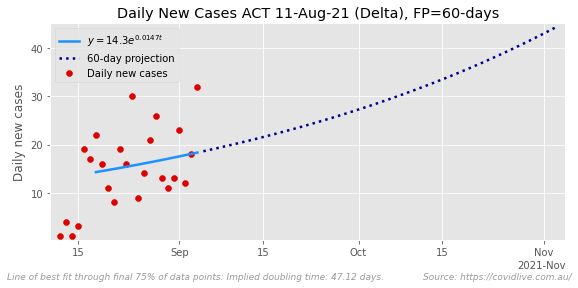

In [46]:
for name, (state, start, stop) in Current_outbreaks.items():    
    print('=' * 50)
    print(name)
    if 'NSW' in name:
        log_regression_plot(name, state, start, stop, final_oos=5, forward=0)
    log_regression_plot(name, state, start, stop, forward=7)
    log_regression_plot(name, state, start, stop, forward=30)    
    log_regression_plot(name, state, start, stop, forward=60)    

### Outbreak Growth Factors

Check Vic 09-Jun-20 (2nd Wave) starting point: [0. 4.]


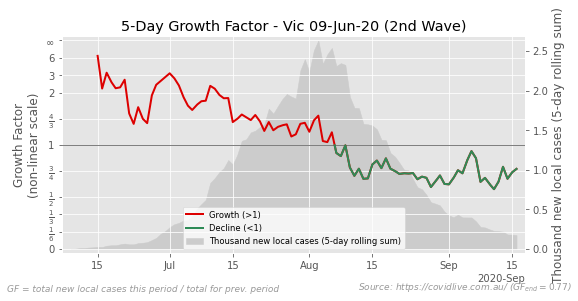

Check NSW 16-Jun-21 (Bondi-Delta) starting point: [0. 2.]


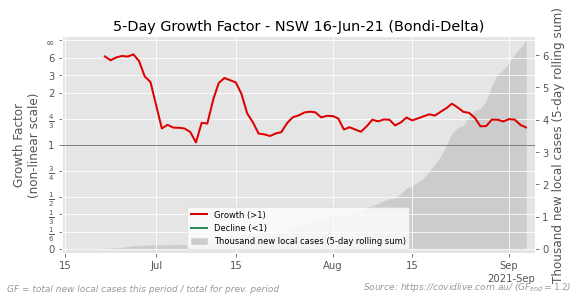

Check Vic 04-Aug-21 (Delta) starting point: [0. 7.]


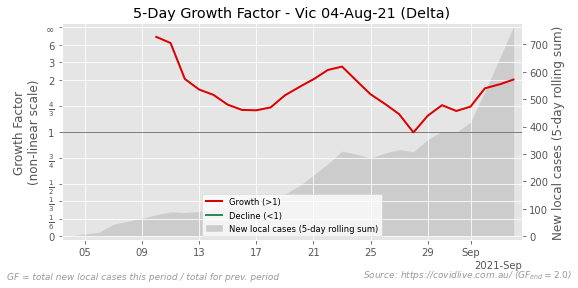

Check ACT 11-Aug-21 (Delta) starting point: [0. 1.]


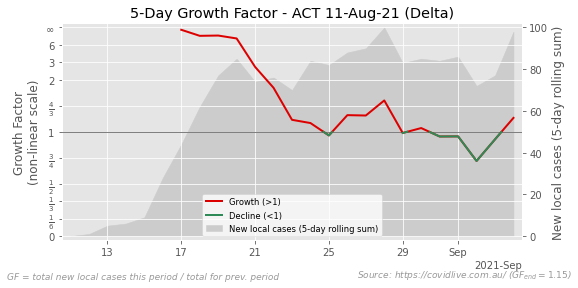

In [47]:
GROWTH_FACTOR_LIST = [5, ] # [5, 7]

gf = {}
for name, (state, start, length) in Vic_2020_vs_Delta.items():
    s = get_local_daily(state, start=start, stop=length)
    print(f'Check {name} starting point: {s[:2].values}')
    
    for period in GROWTH_FACTOR_LIST:

        index = f'{name}{period}'
        gf[index] = ps.plot_growth_factor(
            s,
            period=period,
            mode = 'new local cases',
            title=f'{period}-Day Growth Factor - {name}', 
            ylabel='Growth Factor',
            loc='lower center',
            xlabel=None,
            **std_plot_settings
        )

### Model for the effective reproduction number $R_t$

The SIR compartmental model in discrete terms can be expressed with the following three equations:


1.   $S_t=S_{t-1}-\beta_tI_{t−1}\frac{S_{t−1}}{N}$

1.   $I_t=I_{t−1}+\beta_tI_{t−1}\frac{S_{t−1}}{N}-\gamma I_{t−1}$

1.   $R_t=R_{t−1}+\gamma I_{t−1}$

Where:
*   $\beta_t$ = $R_t$ / infectious period
*   $\gamma$ = 1 / infectious period

The middle line of this set of equations shows that the number infectious on day t is the number infectious on the previous day, plus the newly infectious on day t, minus those who are no longer infectious on day t.

We can take the middle element, assume that S/N is one, and derive the effective reproduction number ($R_t$), based on the following identity:

$$
R_t = \frac{newly\ infectious_t}{infectious\ cohort_{t-1}} * infectious\ period
$$

Note: assuming S/N is one is analogous to a two state SI model, where the recovered people are returned to the susceptible population (at least for small number of infected persons). 

We will smooth the daily infections data in order to manage noise.

We are assuming the average infectiousness period is 7 days for COVID19. 

In [48]:
def model_effective_reproduction(newly_infectious_on_day, 
                                 infectious_period=7):

    # Need at least infectious period data to make sense
    IGNORE_INITIAL = infectious_period + 1 # days 
    SMOOTH_TERM = 13
    
    # sanity check
    if len(newly_infectious_on_day) < SMOOTH_TERM:
        print(f'Insufficient data to calculate the effective reproduction number')
        return None
    
    
    # smooth infections data
    newly_infectious_t = Henderson.Henderson(newly_infectious_on_day, SMOOTH_TERM)
    #newly_infectious_t = newly_infectious_on_day # skip smoothing
    
    infectious_t_minus_1 = (
        newly_infectious_t
        .rolling(infectious_period, min_periods=1)
        .sum()
        .shift(1)
        .dropna()
    )
    
    return (newly_infectious_t / infectious_t_minus_1 * infectious_period)[IGNORE_INITIAL:]
    

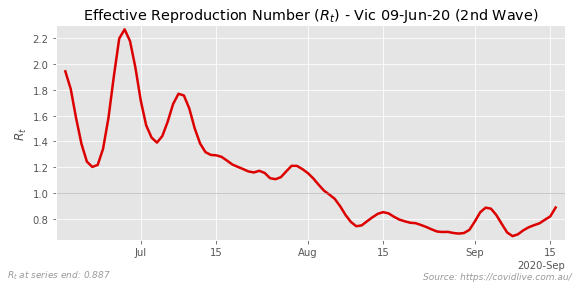

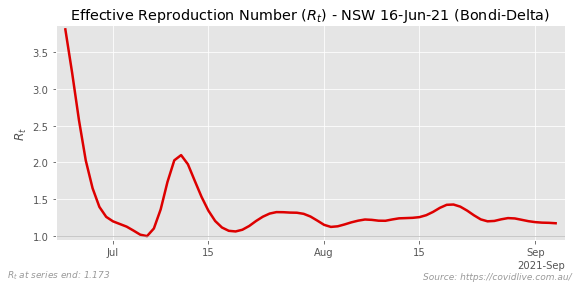

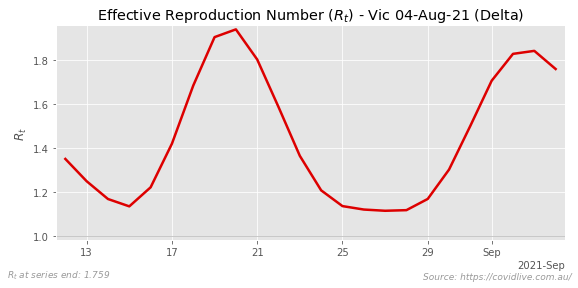

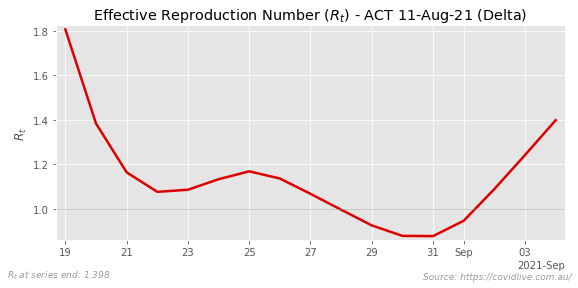

In [49]:
repo_numbers = {}
for name, (state, start, length) in Vic_2020_vs_Delta.items():
    
    # calculate
    span = length if length else 120 # days
    s = get_local_daily(state, start=start, stop=span)
    ip=7
    R_t = model_effective_reproduction(s, ip)
    if R_t is None:
        continue
    repo_numbers[name] = R_t
    
    # plot
    fig, ax = plt.subplots()
    ax.plot(R_t.index.values, R_t.values, lw=2.5, label=name)
    ax.axhline(y=1, color='#999999', lw=0.5, linestyle='-')
    ps.finalise_plot(ax,
            title=f'Effective Reproduction Number ($R_t$) - {name}',
            ylabel='$R_t$',
            xlabel=None,
            lfooter='$R_{t}$ at series end: ' f'{R_t[-1]:0.3f}',
            **std_plot_settings,
                    )

### Comparative $R_t$ and GF

Note that the 5-day on 5-day growth factor is a good proxy for the effective reproduction number (in this case).

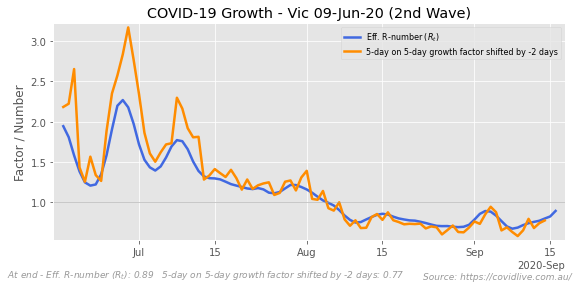

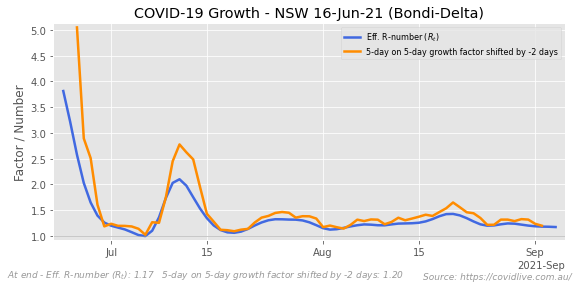

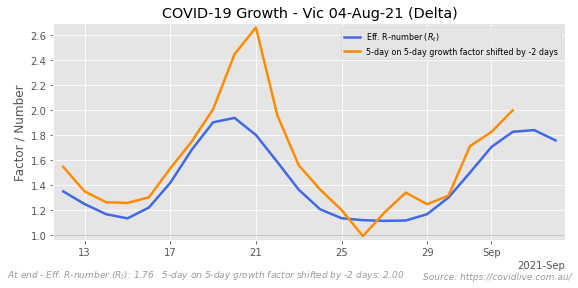

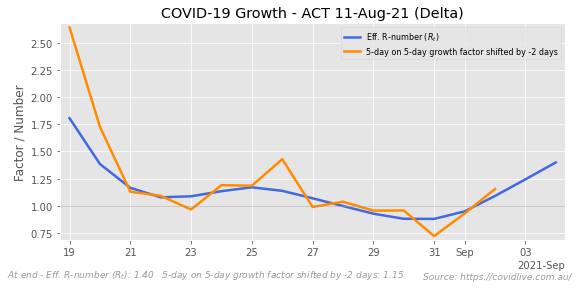

In [50]:
frames = {}
MAX_FACTOR = 6 # used for capping the y axis (None to ignore)
for r, s in repo_numbers.items():
    
    for period in GROWTH_FACTOR_LIST:
        index = f'{r}{period}'
        dict_frame = {}
        rt_label = 'Eff. R-number ($R_t$)'
        dict_frame[rt_label] = s

        if index in gf:
            shift = int(-period // 2) + 1
            shifted = gf[index].shift(shift)
            dict_frame[f'{period}-day on {period}-day growth '
              f'factor shifted by {shift} days'] = shifted
        
        frames[r] = pd.DataFrame(dict_frame).dropna(how='all')
        frames[r] = frames[r][frames[r][rt_label].notna()]
            
    fig, ax = plt.subplots()
    colours = ['#dd0000', 'darkorange', 'royalblue', ]
    tag = 'At end - '
    for col in frames[r].columns:
        line = frames[r][col].copy()
        tag += f'{col}: {line.dropna()[-1]:0.2f}   '
        if MAX_FACTOR:
            line = line.where(line < MAX_FACTOR, other=np.nan)
        ax.plot(line.index.values, line.values, lw=2.5, 
                c=colours.pop(), label=col)
    ax.axhline(y=1, lw=0.5, c='#999999')
    ax.legend(loc='best', prop={'size': 8})
    ps.finalise_plot(ax,
            title=f'COVID-19 Growth - {r}',
            ylabel='Factor / Number',
            lfooter=tag,
            xlabel=None,
            **std_plot_settings,
    )
    

### Doubling times - speculative charts 

Because our daily new case numbers are very noisy, calculating the doubling time is fraught. To get past the noise we look at week on week growth, rather than day on day growth. Also we compare weekly sums, rather than on day weekly statistics. Finally, we compare trends (using a Henderson moving average) rather than compare the raw series.

$$
doubling\ time = \frac{ln(2)}{ln(\frac{s_t}{s_{t-1}})}
$$

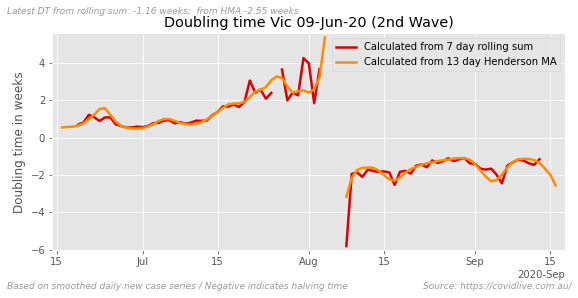

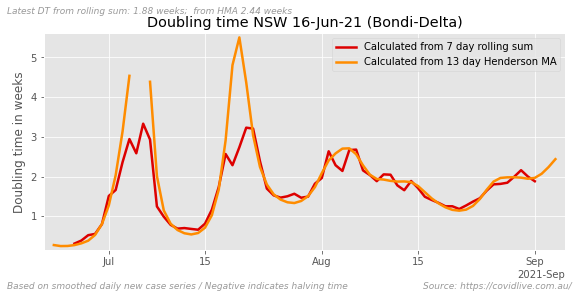

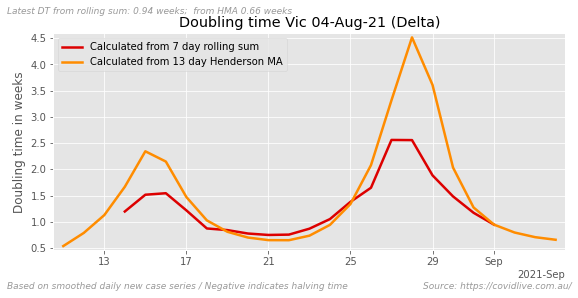

/Users/bryanpalmer/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


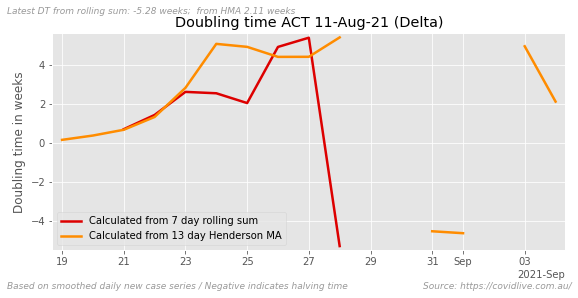

In [51]:
HMA_PERIOD = 13 # days
FRAME = 1 # weeks
DAYS = FRAME * 7 # days
MAXIMA = 6 # ignore peaks

# use analysis_frame above ...
for name, (state, start, length) in Vic_2020_vs_Delta.items():
    
    def _ignore_peaks(series):
        series = series.where(series < MAXIMA, other=np.nan)
        series = series.where(series > -MAXIMA, other=np.nan)
        return series
    
    # get series
    span = length if length else 120 # days
    series = get_local_daily(state, start=start, stop=span)
    
    # formular for doubling time
    def doubling_time(series):
        return np.log(2) / np.log(series/series.shift(DAYS))
    
    # Big problem here is noise 
    # --- 0. original series
    #doubling0 = doubling_time(series).dropna()
    # --- 1. using a rolling sum
    doubling1 = (
        _ignore_peaks(
            doubling_time(series.rolling(DAYS, min_periods=DAYS).sum()).shift(-int(DAYS//2))
        )
    )
    # --- 3. using a Henderson moving average 
    doubling2 = (
        _ignore_peaks(
            doubling_time(Henderson.Henderson(series, HMA_PERIOD))
        )
    )
    
    fig, ax = plt.subplots()
    #ax.plot(doubling0.index, doubling0, lw=2.5, label=f'Calculated from the raw series')
    ax.plot(doubling1.index, doubling1, lw=2.5, label=f'Calculated from {DAYS} day rolling sum')
    ax.plot(doubling2.index, doubling2, lw=2.5, label=f'Calculated from {HMA_PERIOD} day Henderson MA')
    ax.legend(loc='best')
    ax.figure.text(x=0.01, y=0.99, 
                       s=f'Latest DT from rolling sum: {doubling1.dropna()[-1]:,.2f} weeks; '
                         f' from HMA {doubling2[-1]:,.2f} weeks',
                       ha='left', va='top',
                       fontsize=9, fontstyle='italic',
                       color='#999999')

    ps.finalise_plot(ax, 
                     title=f'Doubling time {name}',
                     xlabel=None,
                     ylabel='Doubling time in weeks',
                     lfooter='Based on smoothed daily new case series / Negative indicates halving time',
                     **std_plot_settings,
                    )

### Short-run projections for local new case growth
$$
y = x_{0}e^{kt}; 
$$
Where ...
$$
k = \frac{ln(\frac{x_t}{x_{t-n}})}{n}
$$

In [52]:
def extrapolate(name, state, start, stop):
    """Construct an exponential short-run projection based on recent period growth.
       Note: on small numbers, this model can be overwhelmed by noise."""
    
    # projection parameters
    outlook = 15 # projection days
    term = 15 # days - term for henderson moving average
    pperiod = [3, 7,] # most recent days for establishing growth projection
    
    # get current underlying trend
    s = get_local_daily(state, start=start, stop=stop)
    if len(s) <= term: 
        print(f'{name}: insufficient data for a forecast')
        return
    s_smoothed = Henderson.Henderson(s, term)

    # calculate daily exponetial growth rate
    INDEX_CASE = -1
    stop = max(0, s_smoothed[INDEX_CASE])
    projections = {}
    for period in pperiod:
        if period > term: continue
        if period > len(s_smoothed): continue
        start = max(0, s_smoothed[-period])
        if start == 0: continue
        k = np.log(stop/start) / period
        #print(f'start, stop, k: {start, stop, k}')
        projection = np.arange(0, outlook)
        projection = stop * np.exp(projection * k)
        projection = pd.Series(projection, 
                               index = pd.date_range(s.index[INDEX_CASE], 
                                         periods=outlook, freq='D'))
        projection = projection.drop(projection.index[0])
        projections[f'Projection based on last {period} days of smoothed series ~ $y='
                    f'{stop:,.2f}' 'e^{' f'{k:.4f}t' '}$'] = projection
        print(f'{period}: {projection.round(1).to_list()}')
    
    pframe = {'Historic cases': s,
              'Smoothed cases': s_smoothed,
              **projections}
    pframe = pd.DataFrame(pframe)
    

    colours = ['#dd0000', 'darkorange', 'dodgerblue', 'darkblue']
    lw = [2.5, 1, 2.5, 2.5, 2.5]
    fig, ax = plt.subplots()
    for i, col in enumerate(pframe.columns.to_list()):
        line = pframe[col]
        ax.plot(line.index, line, c=colours[i], lw=lw[i], label=col)
    
    ax.legend(loc='best', prop={'size': 8})
    ps.finalise_plot(ax, 
                     title=f'Outbreak Projection for {name}',
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     **std_plot_settings,
                    )


3: [1436.6, 1471.9, 1508.1, 1545.2, 1583.2, 1622.1, 1662.0, 1702.9, 1744.7, 1787.6, 1831.6, 1876.6, 1922.8, 1970.1]
7: [1450.7, 1501.1, 1553.1, 1607.0, 1662.8, 1720.5, 1780.2, 1841.9, 1905.8, 1972.0, 2040.4, 2111.2, 2184.4, 2260.2]


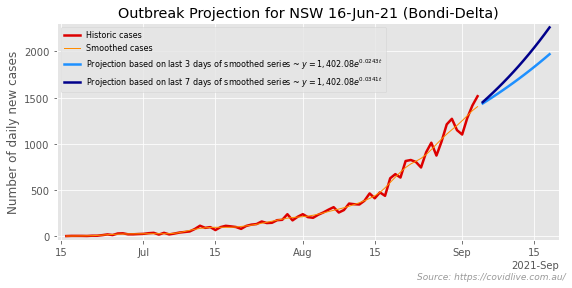

3: [207.3, 224.6, 243.2, 263.5, 285.4, 309.1, 334.8, 362.7, 392.9, 425.6, 461.0, 499.3, 540.8, 585.8]
7: [218.6, 249.7, 285.2, 325.7, 372.1, 425.0, 485.4, 554.4, 633.2, 723.2, 826.1, 943.5, 1077.7, 1230.9]


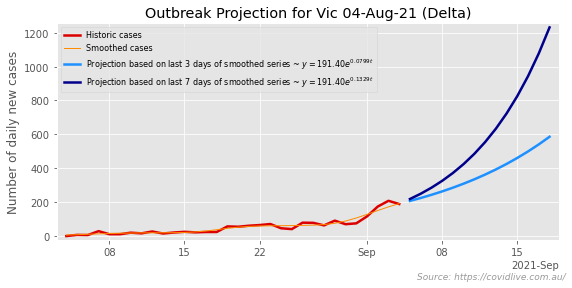

3: [23.4, 24.9, 26.5, 28.2, 29.9, 31.8, 33.9, 36.0, 38.3, 40.8, 43.3, 46.1, 49.0, 52.2]
7: [23.0, 24.1, 25.2, 26.3, 27.5, 28.8, 30.1, 31.5, 32.9, 34.5, 36.0, 37.7, 39.4, 41.2]


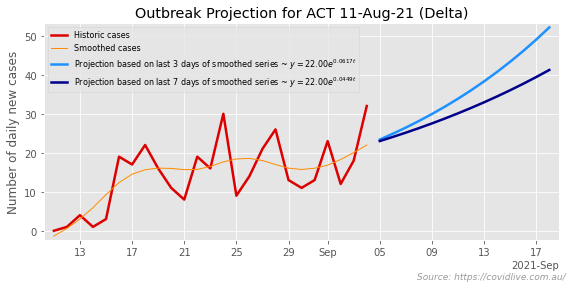

In [53]:
if True:
    
    for name, (state, start, stop) in Current_outbreaks.items():
        extrapolate(name, state, start, stop)


## Hospitalised

In [54]:
# set-up
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)

In [55]:
# get data
idents = ['MED_HOSP_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT']
descs = ['Hospitalised', 'ICU', 'Ventilator']
hospital = {}
for ident, desc in zip(idents, descs):
    data = get_pivot_table(raw_json_data, ident)
    data.index = pd.DatetimeIndex(data.index)
    data = data.dropna(axis=0, how='all')
    hospital[ident] = data

Lastest value less than its predecessor in MED_VENT_CNT for Australia, NSW


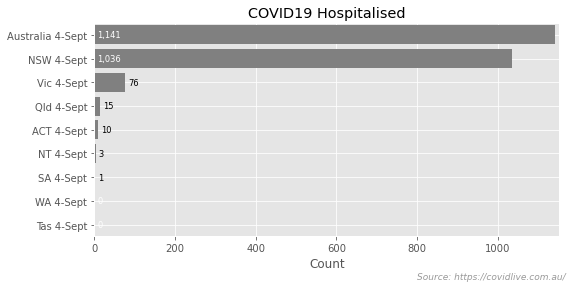

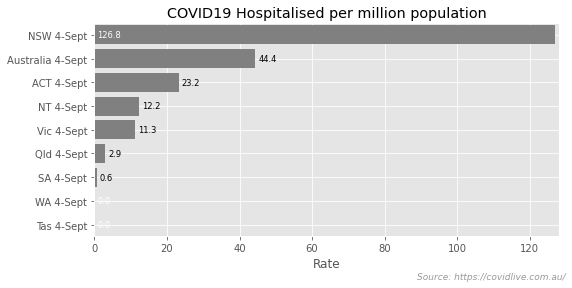

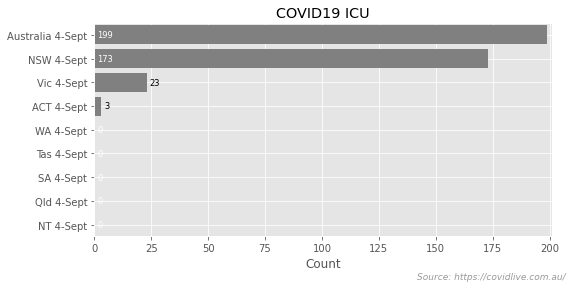

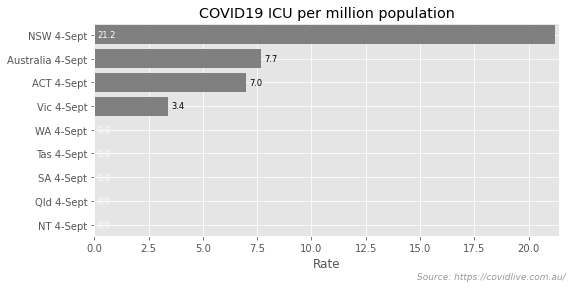

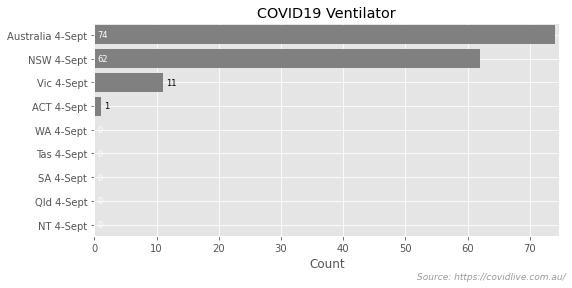

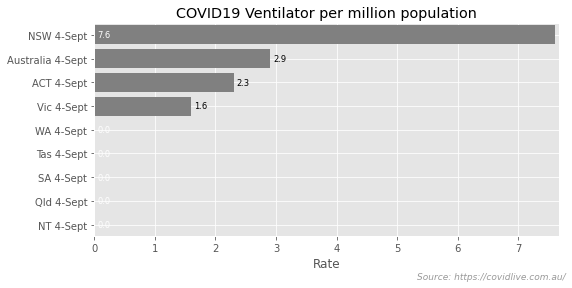

In [56]:
# bar charts
for item, desc in zip(idents, descs):
    two_bar_plots(hospital, item, '', desc)

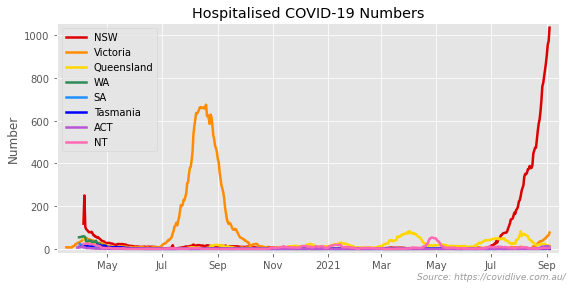

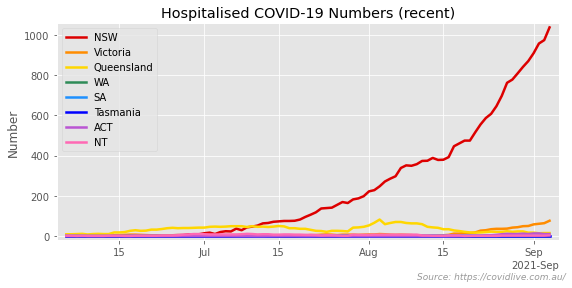

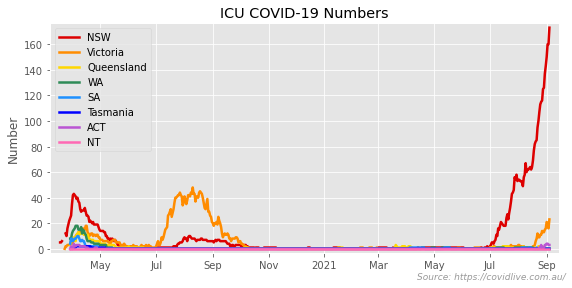

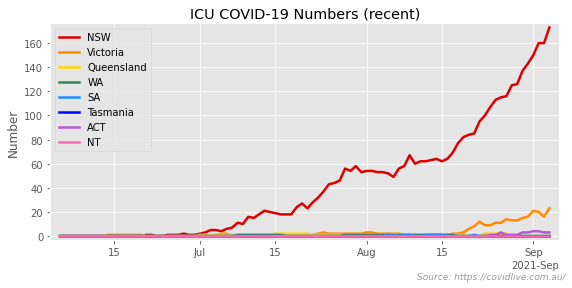

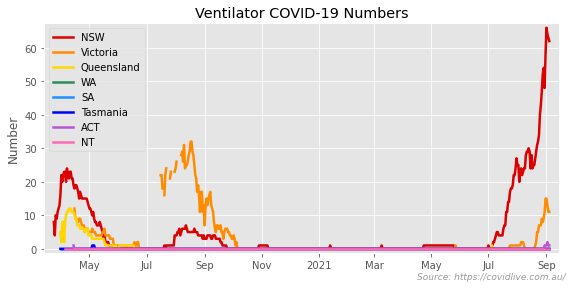

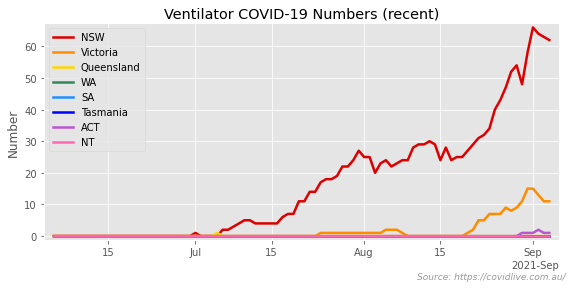

In [57]:
# line charts
for item, desc in zip(idents, descs):
    data = hospital[item]
    line_plots(data, f'{desc} COVID-19 Numbers', 'Number')

## Explore cases to deaths and cases to hospitalisation curves

### supporting functions

In [58]:
def _prune(series, start, stop):
    return series[(series.index >= pd.Timestamp(start))
                  & (series.index <= pd.Timestamp(stop))]
    
def _get_data(item, state, start, stop):
    data = (
        daily_c[item][state]
        .dropna() # for NaNs at series end
    )
    return _prune(data, start, stop)

def _get_data_direct(item, state, start, stop):
    data = (
        get_item(item, raw_json_data)[state]
        .dropna()
    )
    return _prune(data, start, stop)

In [59]:
def get_daily_cases_deaths(state, start, stop):
    cases = _get_data('CASE_CNT', state, start, stop)
    deaths = _get_data('DEATH_CNT', state, start, stop)
    return cases, deaths

In [60]:
CD_SMOOTHING = 7 

def cd_comparison_plot(raw_cases, raw_deaths, 
                       name, d_shift, rolling=CD_SMOOTHING):
    
    # calculate factor adjusting for the left shift in deaths
    total_cases = raw_cases.iloc[:-d_shift].sum() if d_shift else raw_cases.sum()
    total_deaths = raw_deaths.sum()
    factor = total_cases / total_deaths
    print(f'Factor: {factor}; inverse: {1.0/factor}')

    # prepare for plotting
    cases = raw_cases.rolling(rolling).mean()
    deaths = factor * raw_deaths.rolling(rolling).mean().shift(-d_shift)

    suffix = f'{rolling}-day MA'
    deaths_label = f'Deaths * {factor:0.2f} {suffix}'
    if d_shift:
        deaths_label += f'; left-shift: {-d_shift} days'

    # plotting
    fig, ax = plt.subplots()
    data = (
        pd.DataFrame([cases, deaths], index=[f'Cases {suffix}', deaths_label])
        .dropna(axis=1, how='all')
        .T
    )
    for col in data.columns:
        series = data[col]
        ax.plot(series.index, series, lw=2.5, label=col)

    title = name + f' - {rolling}-day Moving Ave'
    if d_shift:
        title += '; deaths left shifted'
        ax.figure.text(x=0.01, y=0.99, 
                       s=f'{total_deaths:,.0f} deaths for {total_cases:,.0f} '
                       f'cases (of {raw_cases.sum():,.0f})',
                       ha='left', va='top',
                       fontsize=8, fontstyle='italic',
                       color='#999999')
        
    multiplier = 100
    ax.legend(loc='best')
    ps.finalise_plot(ax, 
                     title=title, 
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     lfooter=f'{1/factor*multiplier:0.1f} deaths per {multiplier:,} cases',
                     **std_plot_settings,
                    )


In [61]:
def get_best_left_shift(raw_cases, raw_deaths, smooth=CD_SMOOTHING):

    # calculate cases to deaths factor 
    # inflate deaths to achieve parity
    deaths = raw_deaths.copy()
    factor = raw_cases.sum() / raw_deaths.sum()
    deaths = deaths * factor
    
    # smooth both series (because they are so noisy)
    cases = raw_cases.rolling(smooth, center=True, min_periods=1).mean()
    deaths = deaths.rolling(smooth, center=True, min_periods=1).mean()
   
    # test a range of possible options and find the best (minimum)
    max_difference = np.inf
    best = None
    results = {}
    for deviation in range(0, 30):
        abs_difference = (cases - deaths.shift(-deviation))
        abs_difference = abs_difference.abs().sum() 
        abs_difference += deaths.iloc[:deviation].sum(skipna=True) # correct for left shift loss
        results[deviation] = abs_difference
        if abs_difference < max_difference:
            max_difference = abs_difference
            best = deviation
            
    #print(results)
    return best

In [62]:
def running_death_rate(raw_cases, raw_deaths, 
               name, d_shift, rolling=CD_SMOOTHING, 
                       ignore_first=7):
    
    # compute
    deaths = raw_deaths.cumsum()
    cases = raw_cases.shift(d_shift).cumsum()
    running_rate = (
        (deaths / cases)
        .replace(np.inf, 0)
        .replace(0, np.nan)
        .dropna()
    )[ignore_first:] * 100 # per cent
    # note: smoothing means the factor above will differ slightly
    #running_rate = Henderson.Henderson(running_rate, CD_SMOOTHING)
    
    # plot
    title = f'Deaths per 100 diagnosed cases: {name}'
    if d_shift:
        lfooter = f'Comulative deaths today compared with cases {d_shift} days ago (smoothed)'
    
    fig, ax = plt.subplots()
    ax.plot(running_rate.index, running_rate, lw=2)
    ps.finalise_plot(ax, 
                     title=title, 
                     xlabel=None,
                     ylabel='Death rate (%)',
                     lfooter=lfooter,
                     **std_plot_settings,
                    )
    
    return(running_rate)
    

### Establish historical baseline

Factor: 23.29338327091136; inverse: 0.04293064637152964


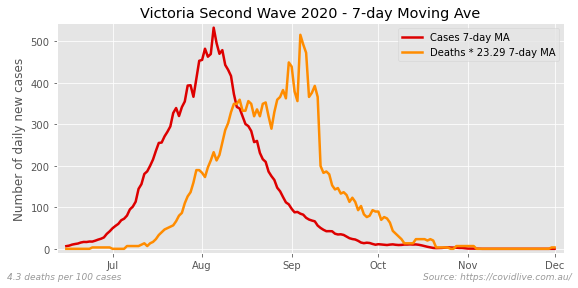

Factor: 23.29338327091136; inverse: 0.04293064637152964


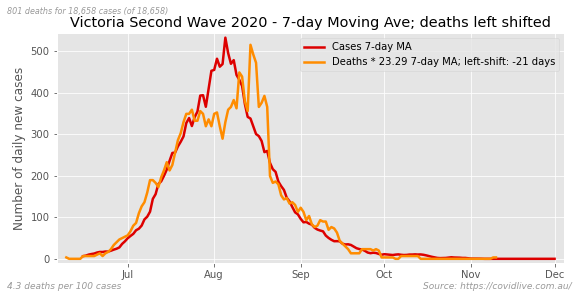

In [63]:
historical = {
        'Victoria Second Wave 2020': ('Victoria', '2020-06-09', '2020-12-01'),
}

for name, (state, start, stop) in historical.items():
    cases, deaths = get_daily_cases_deaths(state, start, stop)
    cd_comparison_plot(cases, deaths, name, 0)
    best_shift = get_best_left_shift(cases, deaths)
    cd_comparison_plot(cases, deaths, name, best_shift)

### Use above baseline to look at the recent Sydney Delta outbreak

In [64]:
current = {
        'NSW June 2021 (Delta)': ('NSW', '2021-06-09', '2021-12-01'),
        #'Vic August 2021 (Delta)': ('Victoria', '2021-08-04', '2021-12-01'),
}


Factor: 60.886178861788615; inverse: 0.016424088663372947


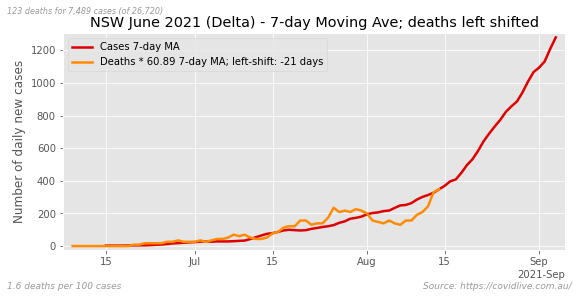

In [65]:
for name, (state, start, stop) in current.items():
    cases, deaths = get_daily_cases_deaths(state, start, stop)
    cd_comparison_plot(cases, deaths, name, best_shift)

### Running death rates

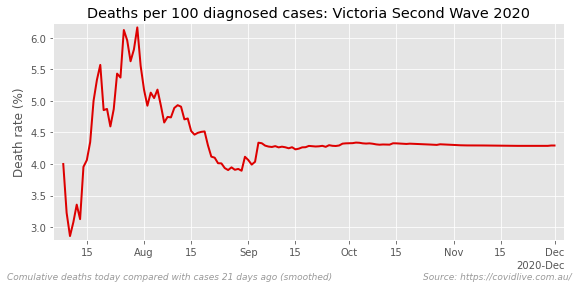

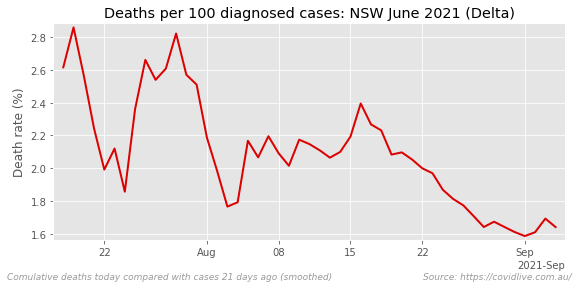

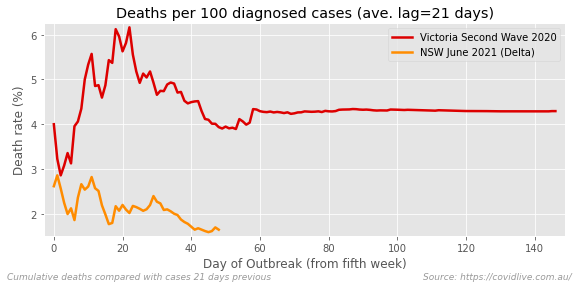

In [66]:
examine = {**historical, **current}
comparator = {}
all_deaths = {}

shift = best_shift # from melbourne 2nd wave above
for name, (state, start, stop) in examine.items():
    cases, deaths = get_daily_cases_deaths(state, start, stop)
    all_deaths[name] = deaths.cumsum().replace(0.0, np.nan).dropna().reset_index(drop=True)
    series = running_death_rate(cases, deaths, name, shift)
    if not len(deaths): continue
    comparator[name] = series.reset_index(drop=True)
        
comparator = pd.DataFrame(comparator)
fig, ax = plt.subplots()
comparator.plot(ax=ax, lw=2.5)
ps.finalise_plot(ax, 
                 title=f'Deaths per 100 diagnosed cases (ave. lag={shift} days)', 
                 xlabel='Day of Outbreak (from fifth week)',
                 ylabel='Death rate (%)',
                 lfooter=f'Cumulative deaths compared with cases {shift} days previous',
                 **std_plot_settings,
                )
       

### running death cumulative sum

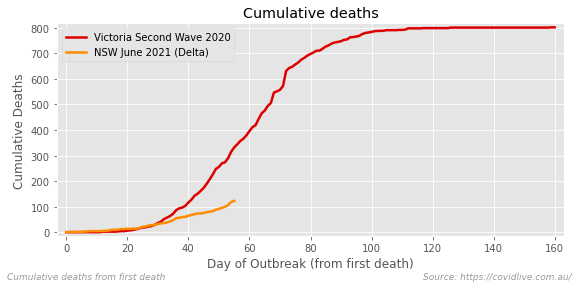

In [67]:
all_deaths = pd.DataFrame(all_deaths)
fig, ax = plt.subplots()
all_deaths.plot(ax=ax, lw=2.5)
ps.finalise_plot(ax, 
                 title=f'Cumulative deaths', 
                 xlabel='Day of Outbreak (from first death)',
                 ylabel='Cumulative Deaths',
                 lfooter=f'Cumulative deaths from first death',
                 **std_plot_settings,
                )


### Active cases and hospitalisations (stock statistics)

In [68]:
def get_active_hospital(state, start, stop, item='MED_HOSP_CNT'):
    active = _get_data_direct('ACTIVE_CNT', state, start, stop)
    hospit = _get_data_direct(item, state, start, stop)
    return active, hospit

In [69]:
def plot_ah(active, hospitalised, name, shift=0, other=''):
    FACTOR = 100
    activesum = active.sum() if not shift else active[:-shift].sum()
    rate = (hospitalised.sum() / activesum) * FACTOR
    
    fig, ax = plt.subplots()
    ax.plot(active.index, active, lw=2.5, label='Active cases')
    ax.plot(hospitalised.index, hospitalised, lw=2.5, label=f'Hospitalised {other}cases')
    ax.legend(loc='best')
    lfooter = f'{rate:0.2f} hospital {other}days per {FACTOR} active case days'
    if shift:
        lfooter += f' (ignoring last {shift} days of cases)'
    ps.finalise_plot(ax,
                     title=f'Active and {other}Hospitalised Cases - {name}',
                     ylabel='Case numbers on day',
                     lfooter=lfooter,
                     **std_plot_settings,
                    )
    
    # plot a progressive rate
    HMA = 13
    active_dropped = active.shift(shift).dropna()
    active_h = Henderson.Henderson(active_dropped, HMA)
    hospital_dropped = hospitalised.dropna()
    hospital_h = pd.Series(Henderson.Henderson(hospitalised.dropna(), HMA),
                           index=hospital_dropped.index)
    rate_h = (hospital_h / active_h * FACTOR).dropna()[7:] # ignore early days
    fig, ax = plt.subplots()
    ax.plot(rate_h.index, rate_h, lw=2.5, label='Rute of hospitalised cases')
    ps.finalise_plot(ax,
                     title=f'Hospitalisation Rate - {name}',
                     ylabel='Trend Hospital Days per\n100 Active Case Days',
                     lfooter=f'Cases right shifted {shift} days. '
                              'Both series smoothed. '
                             f'Endpoint: {rate_h.iloc[-1]:,.2f}',
                     **std_plot_settings,
                    )


Lastest value less than its predecessor in ACTIVE_CNT for ACT, WA


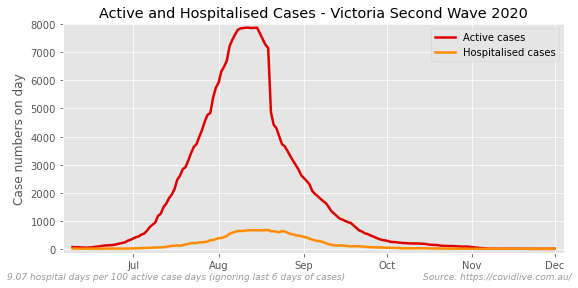

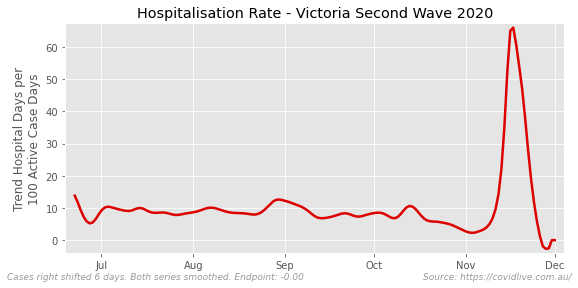

In [70]:
for name, (state, start, stop) in historical.items():
    active, hospitalised = get_active_hospital(state, start, stop)
    shift = get_best_left_shift(active, hospitalised, smooth=CD_SMOOTHING)
    plot_ah(active, hospitalised, name, shift)


In [71]:
current = {
        'NSW June 2021 (Delta)': ('NSW', '2021-06-09', '2021-12-01'),
        'ACT Aug-21 (Delta)':    ['ACT', '2021-08-11', '2021-12-01', ], 
        'Vic Jul-21 (Delta)':    ['Victoria', '2021-07-14', '2021-12-01', ], 
}

Lastest value less than its predecessor in ACTIVE_CNT for ACT, WA


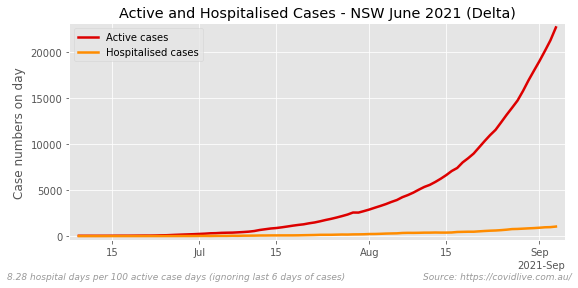

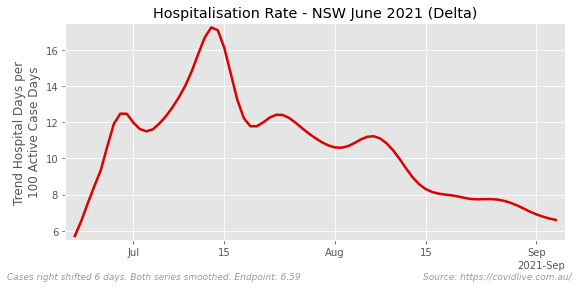

Lastest value less than its predecessor in ACTIVE_CNT for ACT, WA


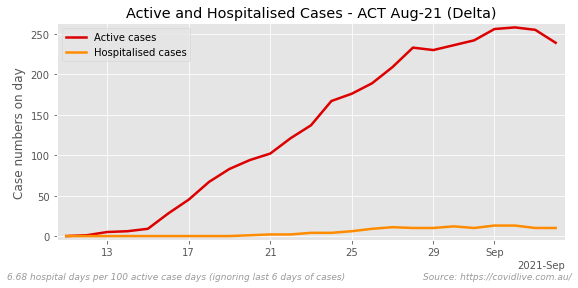

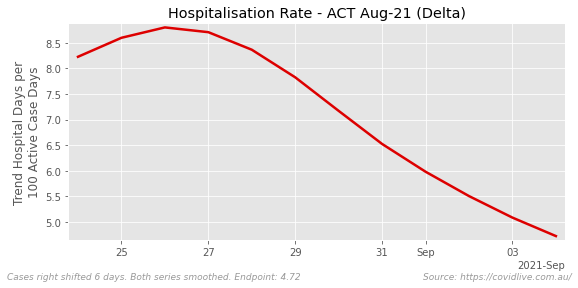

Lastest value less than its predecessor in ACTIVE_CNT for ACT, WA


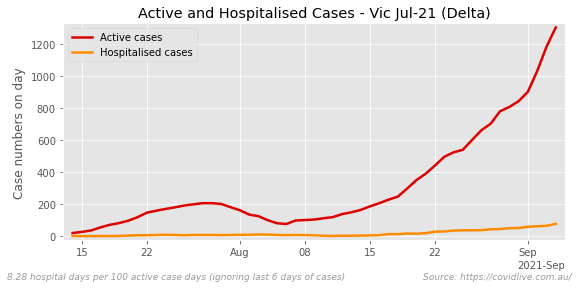

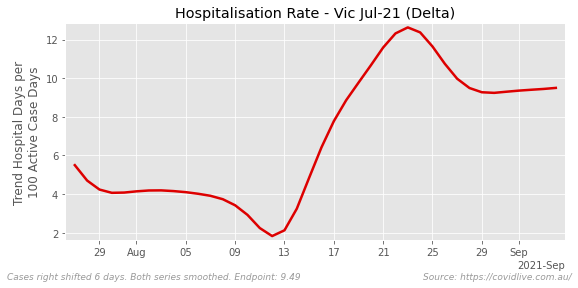

In [72]:
for name, (state, start, stop) in current.items():
    active, hospitalised = get_active_hospital(state, start, stop)
    plot_ah(active, hospitalised, name, shift)

In [73]:
if False:
    for name, (state, start, stop) in historical.items():
        active, hospitalised = get_active_hospital(state, start, stop, item='MED_ICU_CNT')
        shift = get_best_left_shift(active, hospitalised, smooth=CD_SMOOTHING)
        print('---', shift, '---')
        plot_ah(active, hospitalised, name, shift=shift, other='ICU ')

In [74]:
if False:
    for name, (state, start, stop) in current.items():
        active, hospitalised = get_active_hospital(state, start, stop, item='MED_ICU_CNT')
        plot_ah(active, hospitalised, name, shift=shift, other='ICU ')

## Vaccination plots

In [75]:
items = ['VACC_DOSE_CNT', 'VACC_PEOPLE_CNT', 
'VACC_AGED_CARE_CNT', 'VACC_GP_CNT', 'VACC_FIRST_DOSE_CNT',]
data = {}
for item in items:
    data[item] = get_item(item, raw_json_data)

In [76]:
data['VACC_DOSE_CNT'].diff().tail()

NAME             ACT  Australia       NSW      NT  Queensland       SA  \
REPORT_DATE                                                              
2021-08-31    8508.0   276925.0  148297.0  1898.0     34616.0  14468.0   
2021-09-01   12046.0   334832.0  121170.0  2445.0     46359.0  16904.0   
2021-09-02    7389.0   330586.0  139914.0  2796.0     48933.0  16973.0   
2021-09-03    5332.0   301399.0  114726.0  2294.0     49750.0  18137.0   
2021-09-04    7048.0   312275.0  129258.0  2258.0     46663.0  17824.0   

NAME         Tasmania  Victoria       WA  
REPORT_DATE                               
2021-08-31     5159.0   41690.0  22289.0  
2021-09-01     6345.0  105018.0  24545.0  
2021-09-02     5896.0   81683.0  27002.0  
2021-09-03     5489.0   78632.0  27039.0  
2021-09-04     5407.0   79351.0  24466.0

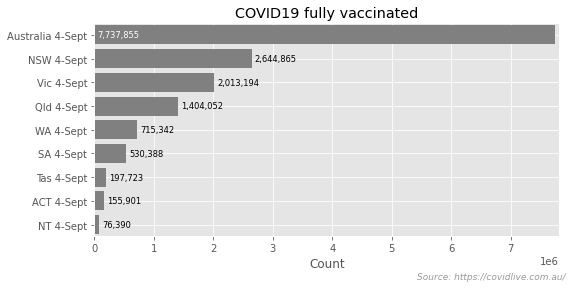

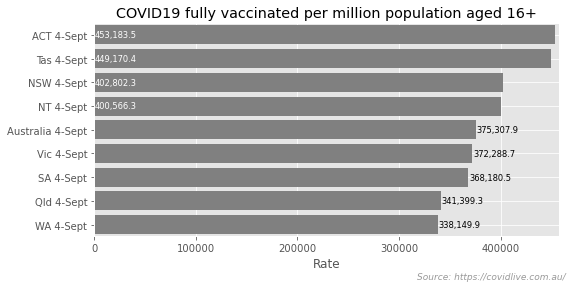

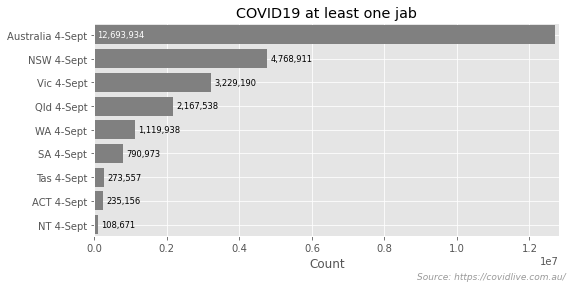

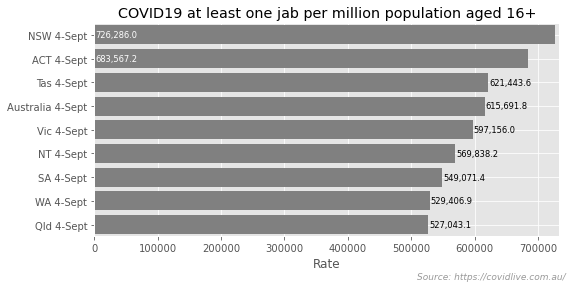

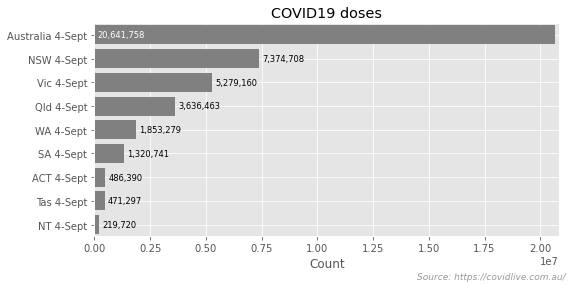

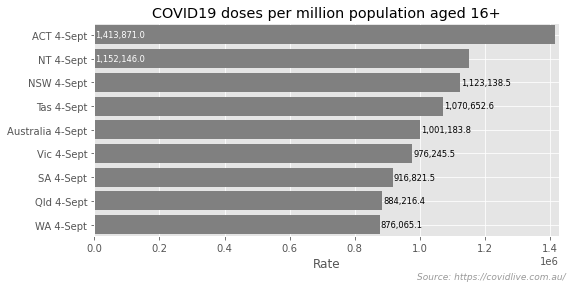

In [77]:
kwargs = {'pop_series': eligible_pop, 'pop_label': 'population aged 16+'}
two_bar_plots(data, 'VACC_PEOPLE_CNT', '', 'fully vaccinated', **kwargs)
two_bar_plots(data, 'VACC_FIRST_DOSE_CNT', '', 'at least one jab', **kwargs)
two_bar_plots(data, 'VACC_DOSE_CNT', '', 'doses', **kwargs)

## The End

In [78]:
print_warnings()
print('Finished')

NOTE: 3 warnings
Lastest value less than its predecessor in MED_VENT_CNT for Australia, NSW
We are missing the latest TEST_CNT for Australia, SA, Tasmania
Lastest value less than its predecessor in ACTIVE_CNT for ACT, WA
Finished
